# **Tiền xử lý dữ liệu và Phân tích khám phá dữ liệu**
File này mô tả quá trình tiền xử lý dữ liệu và phân tích khám phá dữ liệu. Tuy nhiên, ở phần sau của đồ án, nhóm sẽ dùng nhiều loại mô hình khác nhau để dự đoán giá nhà. Mỗi mô hình có một đặc trưng riêng, phù hợp với các phương pháp xử lý dữ liệu bị thiếu, dữ liệu phân loại khác nhau. Do đó, mục đích chính của quá trình tiền xử lý dữ liệu chỉ nhằm phục vụ cho quá trình phân tích khám phá dữ liệu; không làm thay đổi quá nhiều đặc trưng của dữ liệu.

Nội dung:
- 1.Tiền xử lý dữ liệu và Phân tích khám phá dữ liệu
  - Mô tả tổng quan về dữ liệu về dữ liệu
- 2.Tiến hành tiền phân tích xữ lí dữ liệu
  - Xử lý các bài đăng không phù hợp
    - Xóa hàng thiếu dữ liệu
    - Xóa các bài viết bị đăng lại nhiều lần
    - Xóa các bài đăng spam (dùng cột is_real_estate_post)
    - Xóa các bài đăng không nằm trong phân loại bất động sản về Nhà (dùng cột category)
    - Xóa hàng trùng lặp
  - Sử dụng dữ liệu trích xuất từ mô tả điền vào dữ liệu bị thiếu
  - Kiểm tra, xử lý các cột định lượng
    - Tổng quát các cột định lượng
    - Xử lý cột price_per_m2
    - Xử lý giá trị ngoại lai
    - Tổng quan các cột định lượng sau khi xử lý
  - Xử lý các cột định tính
    - Tổng quan về các cột định tính
    - Xử lý cột residential_purpose
  -Các cột còn lại
-3.Kết quả
  - Lưu ý khi sử dụng dữ liệu đã xử lý ở giai đoạn sau của đồ án
-4.Phân tích khám phá dữ liệu
  - Phân tích khám phá dữ liệu chỉ một thuộc tính
    - Cột diện tích
    - Cột category
    - Cột price_per_m2
    - Cột district
    - Cột numbers_of_floors
    - Cột date-posted
    - Cột phone
  - Phân tích khám phá dữ liệu của mối quan hệ giữa 2 thuộc tính
    - Trung bình giá nhà theo các đặc điểm nội thất, tầng hầm, sân thượng
    - Diện tích trung bình theo quận
    - Giá trung bình theo quận
    - Giá trên M2 theo quận
    - Biểu đồ giá theo thời gian
    - Mối quan hệ giữa các biến định lượng
  - Phân tích khám phá dữ liệu của mối liên hệ giữa 3 thuộc tính
    - Mối quan hệ giữa số tầng, giá trung bình, diện tích trung bình
  - Tạo thang điểm đánh giá nhà

## **Mô tả tổng quan về dữ liệu về dữ liệu**

In [ ]:
import pandas as pd
merged_data = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/DataFolder/4_raw_data_merged.csv')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   page_link            11044 non-null  object 
 1   title                11043 non-null  object 
 2   article_id           11043 non-null  float64
 3   category             11043 non-null  object 
 4   phone                11042 non-null  float64
 5   district             11043 non-null  object 
 6   date_posted          11043 non-null  object 
 7   area                 10505 non-null  float64
 8   bedroom              6797 non-null   float64
 9   wc                   6463 non-null   float64
 10  direction            1528 non-null   object 
 11  balcony_direction    997 non-null    object 
 12  description          11043 non-null  object 
 13  is_real_estate_post  11036 non-null  float64
 14  area_LLM             10197 non-null  float64
 15  bedroom_LLM          7466 non-null  

In [ ]:
merged_data.describe()

,article_id,phone,area,bedroom,wc,is_real_estate_post,area_LLM,bedroom_LLM,total_room_LLm,wc_LLM,count_conveniences,alleyway_property,under_mortgage,residential_purpose,furnished,has_lowerlevel,has_rooftop,numbers_of_floors,price,price_per_m2
count,11043.000000,1.104200e+04,10505.000000,6797.000000,6463.000000,11036.000000,10197.000000,7466.000000,4757.000000,5780.000000,11044.000000,7484.000000,1809.000000,4345.000000,2708.000000,2652.000000,3292.000000,9687.000000,1.104300e+04,1.050500e+04
mean,267908.948112,8.716549e+08,154.004974,3.531117,3.367476,0.998641,128.391247,3.576882,4.591970,3.106055,1.635187,0.995858,0.481481,0.999079,0.747046,0.762066,0.837789,2.805409,1.455136e+11,2.380566e+09
std,10131.328289,1.800757e+09,3516.048471,4.085798,3.932781,0.036844,728.782593,3.735788,2.964147,1.902448,1.863862,0.064231,0.499795,0.030331,0.434785,0.425899,0.368701,2.871107,7.601166e+11,1.292328e+10
min,250296.000000,3.697474e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.225000e+06,7.000000e+03
25%,258940.500000,8.655816e+08,48.000000,2.000000,2.000000,1.000000,48.000000,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,3.700000e+09,5.937500e+07
50%,268060.000000,9.057140e+08,63.000000,3.000000,3.000000,1.000000,64.000000,3.000000,4.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.600000e+09,9.400000e+07
75%,277099.500000,9.380594e+08,88.000000,4.000000,4.000000,1.000000,90.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,9.500000e+09,1.343750e+08
max,285164.000000,8.497921e+10,355000.000000,127.000000,127.000000,1.000000,35000.000000,118.000000,74.000000,48.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,9.990000e+12,2.714286e+11


# **Tiến hành tiền phân tích xữ lí dữ liệu**

## **Xử lý các bài đăng không phù hợp**

##### **Xóa hàng thiếu dữ liệu**

In [ ]:
merged_data[merged_data['title'].isnull()]

,page_link,title,article_id,category,phone,district,date_posted,area,bedroom,wc,...,alleyway_property,under_mortgage,residential_purpose,furnished,has_lowerlevel,has_rooftop,numbers_of_floors,street_name,price,price_per_m2
2896,https://batdongsan.vn/du-an-picity-sky-park-ng...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
merged_data.dropna(subset=['title'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)

##### **Xóa các bài viết bị đăng lại nhiều lần**

In [ ]:
merged_data.shape

(11043, 29)

In [ ]:
merged_data.drop_duplicates(subset=['phone', 'description'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)

In [ ]:
merged_data.shape

(9997, 29)

##### **Xóa các bài đăng spam (dùng cột is_real_estate_post)**
Trong những bài đăng về bất động sản, có một số bài chứa đựng nội dung không liên quan, ví dụ: quảng cáo, bán các sản phẩm khác,... Nhờ có mô hình LLM, ta có thể dễ dàng lọc ra những bài đăng không phù hợp.

In [ ]:
merged_data['is_real_estate_post'].value_counts()

is_real_estate_post
1.0    9979
0.0      12
Name: count, dtype: int64

In [ ]:
merged_data.drop(index = merged_data[merged_data['is_real_estate_post'] == 0].index, inplace=True)
merged_data.drop(columns=['is_real_estate_post'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)

##### **Xóa các bài đăng không nằm trong phân loại bất động sản về Nhà (dùng cột category)**

Vì ban đầu khi xác định chỉ xét đến Bất động sản nằm trong mục phân loại Nhà, nên ta chỉ chọn ra những dòng có phân loại thuộc nhóm Nhà. Với nhóm Nhà, các thuộc tính được trích xuất từ mục mô tả: alleyway_property, has_rooftop,... là phù hợp\
<img src="https://github.com/KhiemDangLe/Final-Project/blob/preprocessing/image/image_for_craw_data/phan_loai_bat_dong_san_co_san.png?raw=true" width="100"/>

In [ ]:
merged_data = merged_data[merged_data['category'].isin(['Nhà riêng', 'Nhà', 'Nhà măt phố', 'Nhà cổ', 'Luxury home'])]
merged_data.reset_index(drop=True, inplace=True)
merged_data.shape

(6919, 28)

##### **Xóa hàng trùng lặp**

In [ ]:
merged_data.drop_duplicates(inplace=True)
merged_data.reset_index(drop=True, inplace=True)

<ipython-input-165-25e47306126e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.drop_duplicates(inplace=True)


## **Sử dụng dữ liệu trích xuất từ mô tả điền vào dữ liệu bị thiếu**
Các thuộc tính: giá, diện tích, số phòng ngủ, số phòng vệ sinh, hướng nhà, hướng ban công là những thuộc tính nằm trong mục cố định. Những thuộc tính này đã được trích xuất trong quá trình Crawl website theo từng bài đăng. Tuy nhiên, có những trường hợp, các thuộc tính cố định không xuất hiện; nhưng người đăng tin có đề cập trong mô tả bài viết. Do đó, ta có thể sử dụng dữ liệu từ mô tả để điền vào các mục dữ liệu cố định bị thiếu. \
Cần lưu ý rằng, dùng mô hình LLM trích xuất dữ liệu có thể nhận được dữ liệu sai lệch. Do đó, ban đầu, ta cần so sánh các cột area_LLM, bedroom_LLM, wc_LLM (những cột dùng LLM trích xuất từ mô tả bài đăng) với các cột area, bedroom, wc (những cột chứa các thuộc tính cố định).
<img src="https://github.com/KhiemDangLe/Final-Project/blob/main/image/image_for_craw_data/thuoc_tinh_co_dinh_bi_thieu.png?raw=true" width = 700/>

In [ ]:
merged_data[['area', 'bedroom', 'wc', 'area_LLM', 'bedroom_LLM', 'wc_LLM']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6919 entries, 0 to 6918
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         6619 non-null   float64
 1   bedroom      4596 non-null   float64
 2   wc           4325 non-null   float64
 3   area_LLM     6377 non-null   float64
 4   bedroom_LLM  5302 non-null   float64
 5   wc_LLM       4112 non-null   float64
dtypes: float64(6)
memory usage: 324.5 KB


In [ ]:
count_true_area= 0
count_false_area = 0
count_comparison = 0

for i in range(len(merged_data)):
    if pd.notnull(merged_data['area'].iloc[i]) and pd.notnull(merged_data['area_LLM'].iloc[i]):
        if merged_data['area'].iloc[i] == merged_data['area_LLM'].iloc[i]:
            count_true_area += 1
        else:
            count_false_area += 1
        count_comparison += 1

if count_comparison > 0:
    print("Tỉ lệ thông tin diện tích trích xuất là đúng:", count_true_area / count_comparison)
    print("Tỉ lệ thông tin diện tích trích xuất là sai:", count_false_area / count_comparison)
else:
    print("Không có dữ liệu để so sánh.")


Tỉ lệ thông tin diện tích trích xuất là đúng: 0.7847062684607811
Tỉ lệ thông tin diện tích trích xuất là sai: 0.2152937315392189


In [ ]:
count_true_bedroom = 0
count_false_bedroom = 0
count_comparison = 0

for i in range(len(merged_data)):
    if pd.notnull(merged_data['bedroom'].iloc[i]) and pd.notnull(merged_data['bedroom_LLM'].iloc[i]):
        if merged_data['bedroom'].iloc[i] == merged_data['bedroom_LLM'].iloc[i]:
            count_true_bedroom += 1
        else:
            count_false_bedroom += 1
        count_comparison += 1

if count_comparison > 0:
    print("Tỉ lệ thông tin phòng ngủ trích xuất là đúng:", count_true_bedroom / count_comparison)
    print("Tỉ lệ thông tin phòng ngủ trích xuất là sai:", count_false_bedroom / count_comparison)
else:
    print("Không có dữ liệu để so sánh.")


Tỉ lệ thông tin phòng ngủ trích xuất là đúng: 0.9333161688980433
Tỉ lệ thông tin phòng ngủ trích xuất là sai: 0.06668383110195675


In [ ]:
count_true_wc = 0
count_false_wc = 0
count_comparison = 0

for i in range(len(merged_data)):
    if pd.notnull(merged_data['wc'].iloc[i]) and pd.notnull(merged_data['wc_LLM'].iloc[i]):
        if merged_data['wc'].iloc[i] == merged_data['wc_LLM'].iloc[i]:
            count_true_wc += 1
        else:
            count_false_wc += 1
        count_comparison += 1

if count_comparison > 0:
    print("Tỉ lệ thông tin phòng wc trích xuất là sai:", count_true_wc / count_comparison)
    print("Tỉ lệ thông tin phòng wc trích xuất là sai:", count_false_wc / count_comparison)
else:
    print("Không có dữ liệu để so sánh.")


Tỉ lệ thông tin phòng wc trích xuất là sai: 0.8900697442710063
Tỉ lệ thông tin phòng wc trích xuất là sai: 0.10993025572899369


Ta thấy tỉ lệ thông tin trích xuất đúng là cao ~ 80% đối với diện tích, rất cao ~90% đối với 2 cột còn lại. Ta dùng dữ liệu trích xuất để điền vào dữ liệu bị thiếu. Riêng cột area, không có dữ liệu bị thiếu.

In [ ]:
merged_data['area'].fillna(merged_data['area_LLM'], inplace=True)
merged_data['bedroom'].fillna(merged_data['bedroom_LLM'], inplace=True)
merged_data['wc'].fillna(merged_data['wc_LLM'], inplace=True)
merged_data.drop(columns=['area_LLM', 'bedroom_LLM', 'wc_LLM'], inplace=True)
merged_data.reset_index(drop = True, inplace = True)


## **Kiểm tra, xử lý các cột định lượng**

### **Tổng quát các cột định lượng**

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6919 entries, 0 to 6918
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   page_link            6919 non-null   object 
 1   title                6919 non-null   object 
 2   article_id           6919 non-null   float64
 3   category             6919 non-null   object 
 4   phone                6918 non-null   float64
 5   district             6919 non-null   object 
 6   date_posted          6919 non-null   object 
 7   area                 6902 non-null   float64
 8   bedroom              6014 non-null   float64
 9   wc                   5426 non-null   float64
 10  direction            719 non-null    object 
 11  balcony_direction    318 non-null    object 
 12  description          6919 non-null   object 
 13  total_room_LLm       3501 non-null   float64
 14  count_conveniences   6919 non-null   int64  
 15  alleyway_property    5843 non-null   f

In [ ]:
import numpy as np

quantitative_columns = ['area', 'bedroom', 'wc', 'total_room_LLm', 'count_conveniences', 'numbers_of_floors', 'price', 'price_per_m2']

for column in quantitative_columns:
  print(f"**{column}**")
  print(f"Min: {merged_data[column].min()}")
  print(f"Q1: {np.nanpercentile(merged_data[column], 25)}")
  print(f"Q2: {np.nanpercentile(merged_data[column], 50)}")
  print(f"Q3: {np.nanpercentile(merged_data[column], 75)}")
  print(f"Max: {merged_data[column].max()}")
  print(f"Số dữ liệu bị thiếu so với tổng: {merged_data[column].isnull().sum()} / {merged_data.shape[0]}")
  print(f"Độ lệch: {merged_data[column].skew()}")
  print()



**area**
Min: 2.0
Q1: 44.0
Q2: 56.0
Q3: 77.0
Max: 32825.0
Số dữ liệu bị thiếu so với tổng: 17 / 6919
Độ lệch: 73.30232781389363

**bedroom**
Min: 1.0
Q1: 2.0
Q2: 3.0
Q3: 4.0
Max: 118.0
Số dữ liệu bị thiếu so với tổng: 905 / 6919
Độ lệch: 15.258206364427322

**wc**
Min: 1.0
Q1: 2.0
Q2: 3.0
Q3: 4.0
Max: 111.0
Số dữ liệu bị thiếu so với tổng: 1493 / 6919
Độ lệch: 15.017751072595317

**total_room_LLm**
Min: 1.0
Q1: 3.0
Q2: 4.0
Q3: 5.0
Max: 50.0
Số dữ liệu bị thiếu so với tổng: 3418 / 6919
Độ lệch: 5.972899079261609

**count_conveniences**
Min: 0
Q1: 0.0
Q2: 1.0
Q3: 3.0
Max: 14
Số dữ liệu bị thiếu so với tổng: 0 / 6919
Độ lệch: 1.0489905920337683

**numbers_of_floors**
Min: 0.0
Q1: 2.0
Q2: 2.0
Q3: 3.0
Max: 12.0
Số dữ liệu bị thiếu so với tổng: 489 / 6919
Độ lệch: 0.8198769855567749

**price**
Min: 1550000.0
Q1: 3900000000.0
Q2: 5450000000.0
Q3: 7800000000.0
Max: 9990000000000.0
Số dữ liệu bị thiếu so với tổng: 0 / 6919
Độ lệch: 11.88074377794937

**price_per_m2**
Min: 12234.04255319149
Q1: 

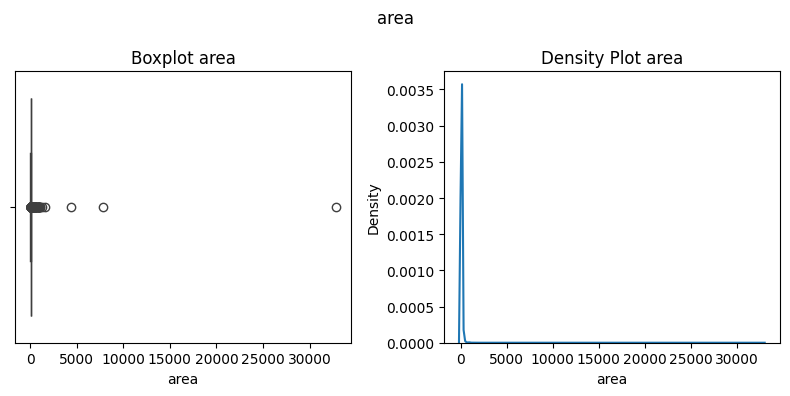

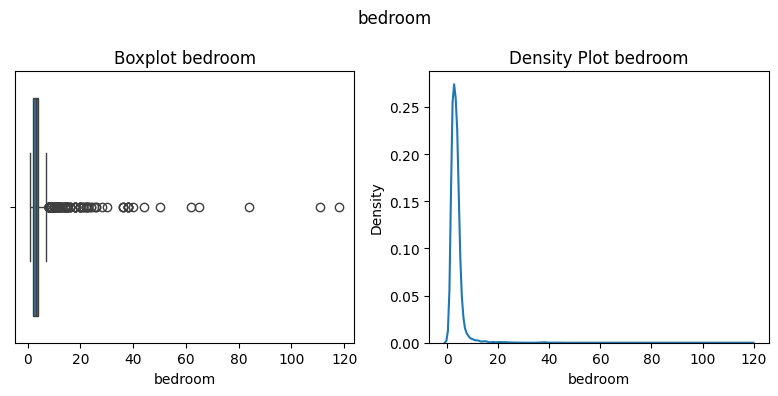

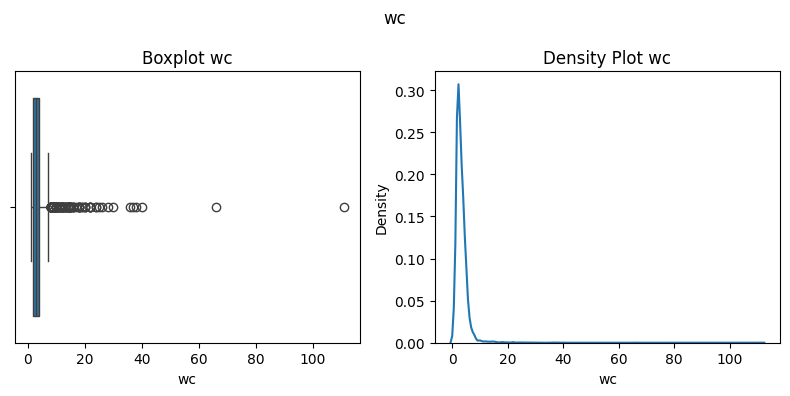

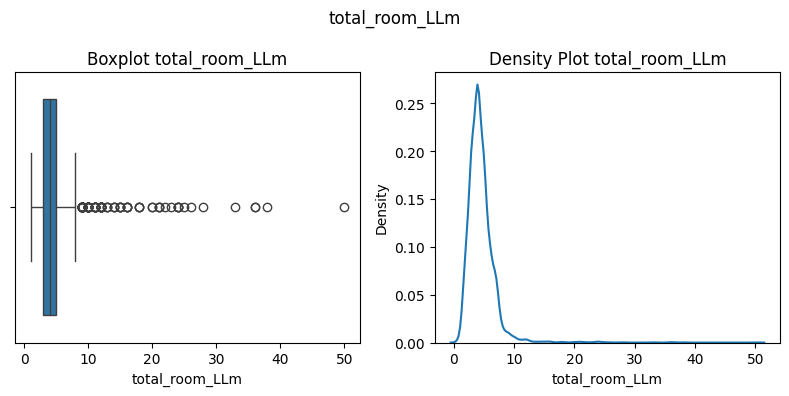

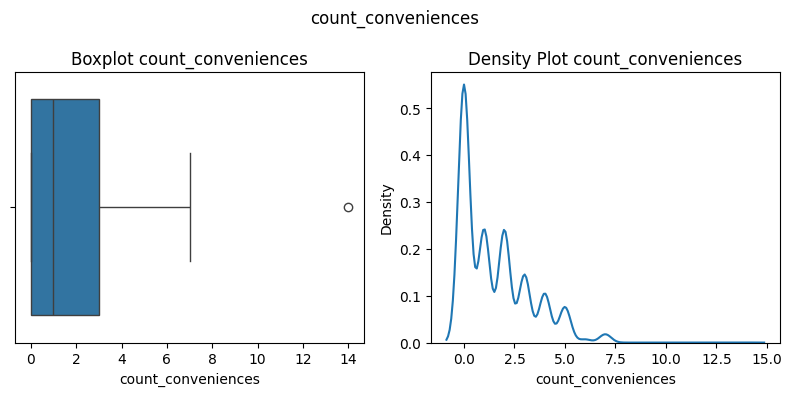

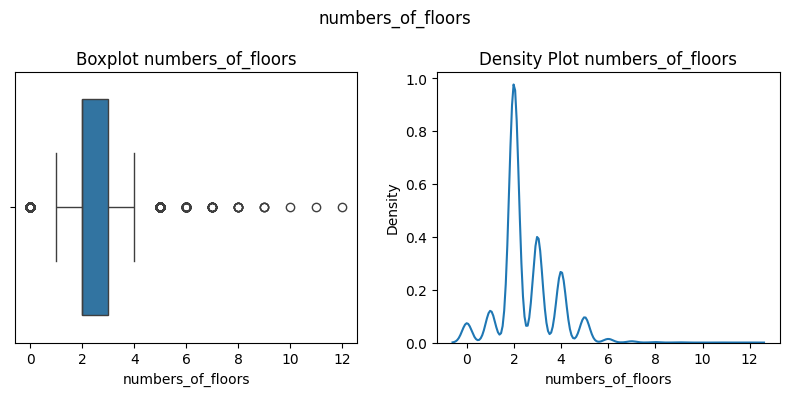

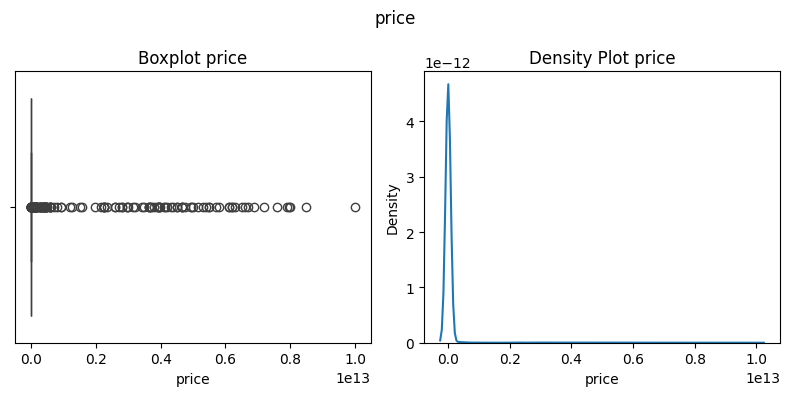

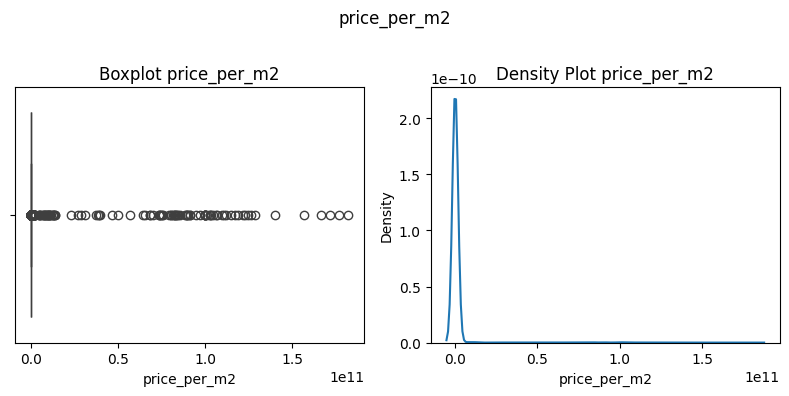

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in quantitative_columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Boxplot
    sns.boxplot(x=merged_data[column], ax=axes[0])
    axes[0].set_title(f'Boxplot {column}')
    # Density plot
    sns.kdeplot(merged_data[column], ax=axes[1]) # Changed index to 1
    axes[1].set_title(f'Density Plot {column}') # Changed index to 1

    fig.suptitle(column)
    plt.tight_layout()
    plt.show()



### **Xử lý cột price_per_m2**

Kiểm tra tổng số dòng tồn tại dữ liệu ở cột price, area, nhưng không tồn tại dữ liệu ở cột price_per_m2

In [ ]:
count = 0
for i in range(len(merged_data)):
    if pd.notnull(merged_data['price'].iloc[i]) and pd.notnull(merged_data['area'].iloc[i]) and pd.isnull(merged_data['price_per_m2'].iloc[i]):
        count += 1
print("Số hàng: ", count)

Số hàng:  283


Điền các dòng có giá trị price_per_m2 bị tính thiếu

In [ ]:
from IPython.display import clear_output
clear_output()
for i in range(len(merged_data)):
    if pd.notnull(merged_data['price'].iloc[i]) and pd.notnull(merged_data['area'].iloc[i]) and pd.isnull(merged_data['price_per_m2'].iloc[i]):
        merged_data['price_per_m2'].iloc[i] = merged_data['price'].iloc[i] / merged_data['area'].iloc[i]

<ipython-input-175-1ae35ab6a2a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['price_per_m2'].iloc[i] = merged_data['price'].iloc[i] / merged_data['area'].iloc[i]
<ipython-input-175-1ae35ab6a2a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['price_per_m2'].iloc[i] = merged_data['price'].iloc[i] / merged_data['area'].iloc[i]
<ipython-input-175-1ae35ab6a2a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

### **Xử lý giá trị ngoại lai**

| Phương pháp loại bỏ | Mô tả | Điểm lợi | Điểm hại |
|---|---|---|---|
| **Loại bỏ theo quy tắc 3 sigma** | Loại bỏ các giá trị nằm ngoài khoảng [trung bình - 3*độ lệch chuẩn, trung bình + 3*độ lệch chuẩn] | - Dễ thực hiện, phổ biến | - Phù hợp với dữ liệu phân phối chuẩn, không hiệu quả với dữ liệu không phân phối chuẩn |
| **Loại bỏ theo IQR** | Loại bỏ các giá trị nằm ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR] (Q1: tứ phân vị thứ nhất, Q3: tứ phân vị thứ ba, IQR: khoảng tứ phân vị) | - Phù hợp với dữ liệu không phân phối chuẩn | - Có thể loại bỏ quá nhiều dữ liệu, đặc biệt khi dữ liệu có nhiều outlier |
| **Loại bỏ theo giá trị cực trị** | Loại bỏ các giá trị lớn nhất hoặc nhỏ nhất | - Dễ thực hiện, phù hợp với dữ liệu có outlier rõ ràng | - Không chính xác, có thể loại bỏ dữ liệu có giá trị hợp lệ |
| **Loại bỏ theo phân tích cụm** | Phân chia dữ liệu thành các cụm, loại bỏ các giá trị nằm trong cụm có outlier | - Phù hợp với dữ liệu có nhiều outlier, có thể xác định được outlier theo cụm | - Phức tạp, cần có kiến thức về phân tích cụm |
| **Thay thế outlier** | Thay thế outlier bằng giá trị trung bình, trung vị, hoặc giá trị ngoại suy | - Giữ nguyên số lượng dữ liệu | - Có thể làm giảm độ chính xác của mô hình |
| **Không loại bỏ outlier** | Giữ nguyên outlier trong dữ liệu | - Giữ nguyên thông tin ban đầu | - Có thể ảnh hưởng đến kết quả phân tích |

Trong mục **Tổng quát các cột định lượng**, ngoại trừ các cột count_conviences và cột numbers_of_floors, các cột còn lại đều có phân phối lệch phải rất nặng. Sử dụng loại bỏ theo quy tắc 3 sigma không phù hợp vì không phải phân phối chuẩn. Do đó, ta sẽ thử dùng IQR để loại bỏ các giá trị ngoại lai. \
Tuy nhiên, riêng cột số tầng numbers_of_floors có chứa 2 khoảng giá trị ngoại lai: [0, 0] và [5, 12]. Dựa vào thực tế, những giá trị đó không phải là giá trị bất thường.

**Dùng IQR**

In [ ]:
import numpy as np
import pandas as pd


columns_with_outliers = ['area', 'price_per_m2', 'bedroom', 'wc', 'total_room_LLm', 'count_conveniences', 'price', 'price_per_m2']
temp = merged_data.copy()
print(temp.shape)
for column in columns_with_outliers:
    # Tính IQR
    Q1 = np.nanpercentile(temp[column], 0.25)
    Q3 = np.nanpercentile(temp[column], 0.75)
    IQR = Q3 - Q1

    # Tính khoảng giới hạn
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loại bỏ các giá trị ngoại lai
    null_filter = temp[column].isnull().values
    outlier_filter = np.logical_and(temp[column] >= lower_bound, temp[column] <= upper_bound)
    filter = np.logical_or(null_filter, outlier_filter)
    temp = temp[filter]
    print(temp.shape)


(6919, 25)
(192, 25)
(19, 25)
(4, 25)
(4, 25)
(4, 25)
(4, 25)
(1, 25)
(1, 25)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Ta thấy rằng nếu lọc hết tất cả outlier của các cột, dữ liệu thu được chỉ còn 1 dòng duy nhất. Ta cần kiểm tra lại các cột. Như trong kết quả trên, sau khi lọc giá trị ngoại lai của cột area, toàn bộ dữ liệu gần như bị lọc hết. Bắt buộc, ta phải xem xét từng thuộc tính và dùng hiểu biết về tính chất của thuộc tính đó để loại các giá trị ngoại lai

**Xử lý cột area**

In [ ]:
bins = [0,100, 150, 200, 500, 1000, 5000, merged_data['area'].max()]
binned_counts = pd.cut(merged_data['area'], bins=bins).value_counts()
print(binned_counts)

area
(0.0, 100.0]         6093
(100.0, 150.0]        466
(200.0, 500.0]        169
(150.0, 200.0]        153
(500.0, 1000.0]        14
(1000.0, 5000.0]        5
(5000.0, 32825.0]       2
Name: count, dtype: int64


Sau khi xem qua một số bài đăng có diện tích lớn và dựa vào hiểu biết của các thành viên trong nhóm, nhóm chỉ lấy ra những hàng có giá trị nhỏ hơn 150 m2. Đó là kích thước phổ biến của các ngôi nhà thông thường. \
Ví dụ về 1 bài đăng bán nhà có diện tích khá lớn, nhưng vẫn là một bài đăng hợp lệ: https://batdongsan.vn/ban-can-biet-thu-nghi-duong-san-vuon-tp-thu-duc-dt-dat-830m2-r256114

In [ ]:
merged_data.drop(index = merged_data[merged_data['area'] > 150].index, inplace=True)
merged_data.reset_index(drop=True, inplace=True)

**Xử lý cột price**

In [ ]:
bins = [0,1 ,5 , 7.5, 10, 25, 50, 100, 200, 500, 100000]

# Chia khoảng theo đơn vị tỷ
binned_counts = pd.cut(merged_data['price']/1000000000, bins=bins).value_counts()
print(binned_counts)

price
(1.0, 5.0]           2849
(5.0, 7.5]           1954
(7.5, 10.0]           753
(10.0, 25.0]          581
(0.0, 1.0]            241
(500.0, 100000.0]      81
(25.0, 50.0]           56
(50.0, 100.0]          39
(200.0, 500.0]         17
(100.0, 200.0]          5
Name: count, dtype: int64


Xem các bài đăng trong đường dẫn sau: https://batdongsan.vn/ban-nha-thu-duc-ho-chi-minh-tren-30-ty \
Dựa vào hiểu biết của các thành viên trong nhóm, nhóm chỉ lấy ra những hàng có giá trị nhỏ hơn 10 tỷ. Đó là khoảng giá phù hợp cho một ngôi nhà phổ biến.

In [ ]:
merged_data.drop(index = merged_data[merged_data['price'] > 10000000000].index, inplace=True)
merged_data.drop(index = merged_data[merged_data['price'] < 100000000].index, inplace = True)
merged_data['price'] = merged_data['price']/1000000000
merged_data['price_per_m2'] = merged_data['price_per_m2']/1000000000
merged_data.reset_index(drop=True, inplace=True)
merged_data.shape

(5675, 25)

**Kiểm tra các cột còn lại**

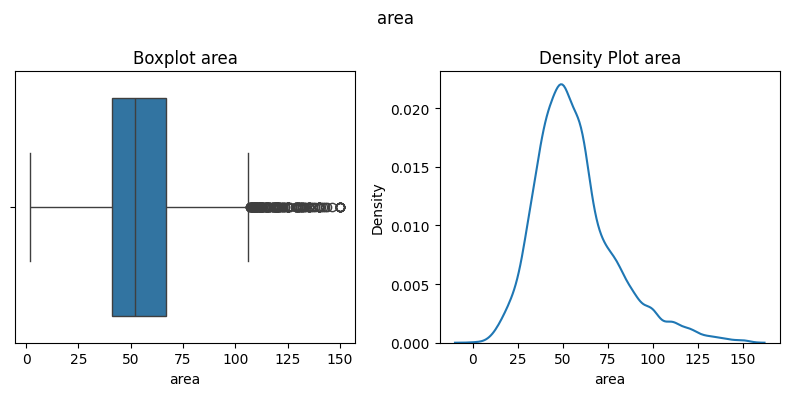

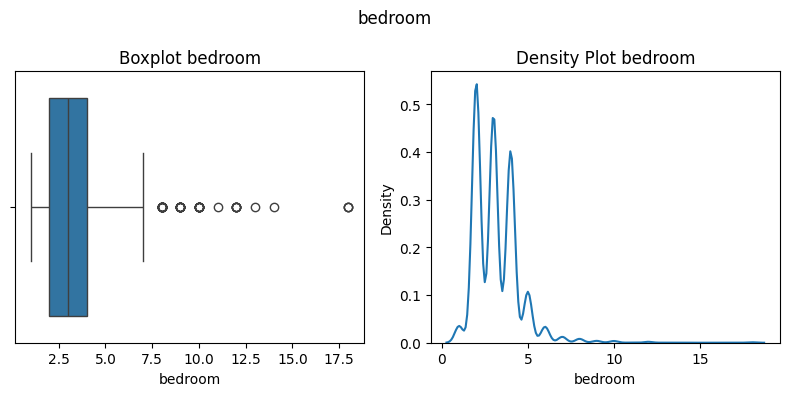

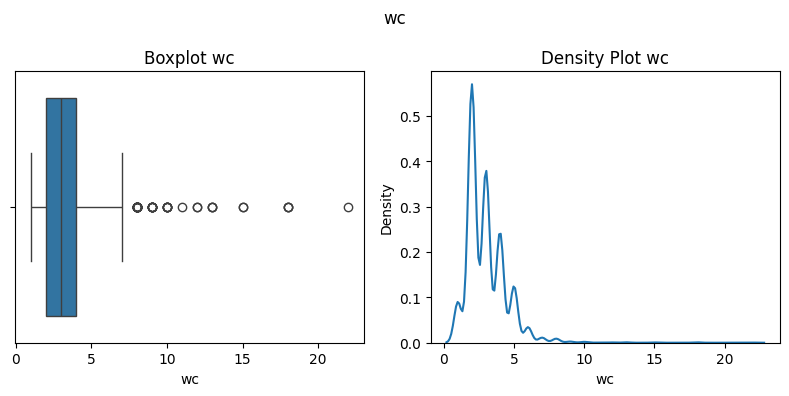

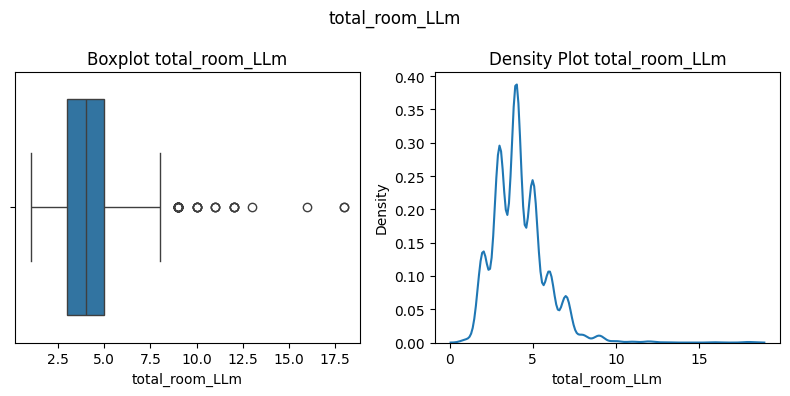

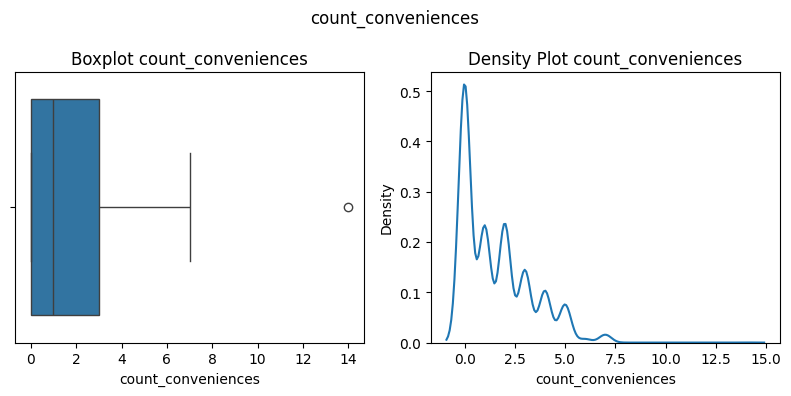

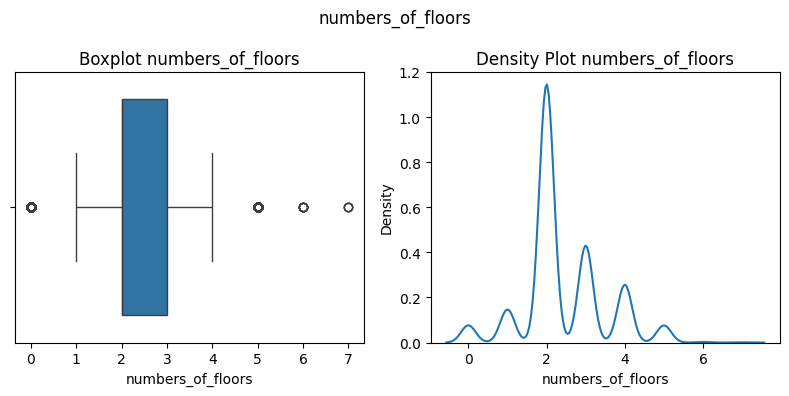

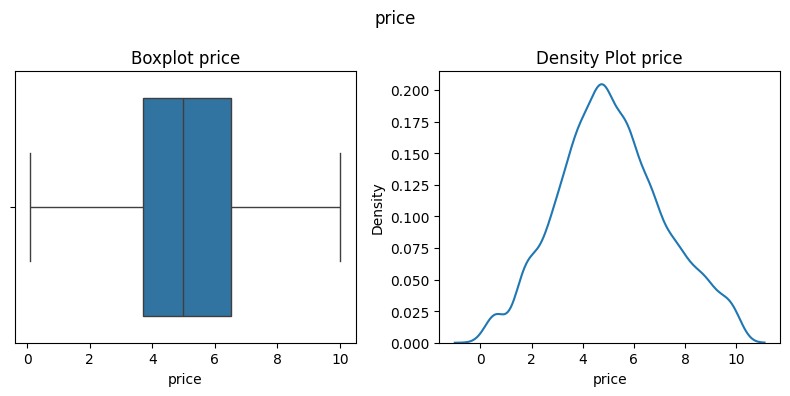

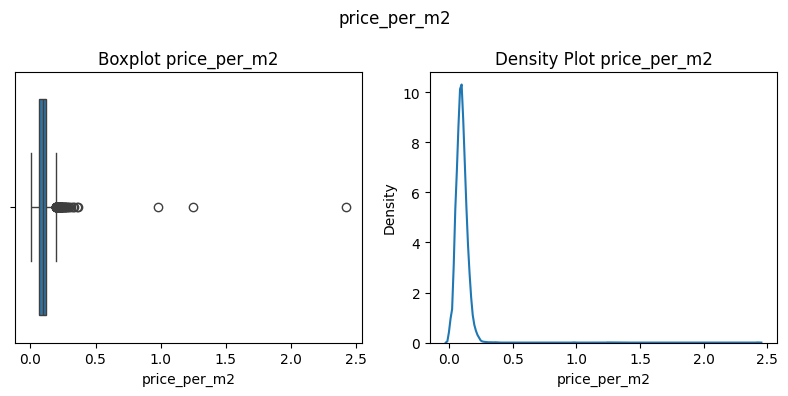

In [ ]:
for column in quantitative_columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Boxplot
    sns.boxplot(x=merged_data[column], ax=axes[0])
    axes[0].set_title(f'Boxplot {column}')
    # Density plot
    sns.kdeplot(merged_data[column], ax=axes[1]) # Changed index to 1
    axes[1].set_title(f'Density Plot {column}') # Changed index to 1

    fig.suptitle(column)
    plt.tight_layout()
    plt.show()


Đối với các cột bedroom, wc, total_room, count_conveniences là những cột đơn giản, ta có thể nhanh chóng chọn những giá trị cho chúng. Nếu sử dụng IQR cho những cột này cũng không phù hợp, vì phân bố dữ liệu bị lệch rất lớn. Cách xử lý tương tự hai cột trên.

In [ ]:
bins = [0,3 ,5, 7, 10, merged_data['bedroom'].max()]
binned_counts = pd.cut(merged_data['bedroom'], bins=bins).value_counts()
print(binned_counts)

bedroom
(0.0, 3.0]      3263
(3.0, 5.0]      1570
(5.0, 7.0]       141
(7.0, 10.0]       48
(10.0, 18.0]      12
Name: count, dtype: int64


In [ ]:
bins = [0,3 ,5, 7, 10, merged_data['wc'].max()]
binned_counts = pd.cut(merged_data['wc'], bins=bins).value_counts()
print(binned_counts)

wc
(0.0, 3.0]      3250
(3.0, 5.0]      1154
(5.0, 7.0]       142
(7.0, 10.0]       42
(10.0, 22.0]      12
Name: count, dtype: int64


In [ ]:
bins = [0,3 ,5, 7, 10, 15, merged_data['total_room_LLm'].max()]
binned_counts = pd.cut(merged_data['total_room_LLm'], bins=bins).value_counts()
print(binned_counts)

total_room_LLm
(3.0, 5.0]      1453
(0.0, 3.0]      1000
(5.0, 7.0]       404
(7.0, 10.0]       55
(10.0, 15.0]       8
(15.0, 18.0]       3
Name: count, dtype: int64


In [ ]:
bins = [0,3 ,5, 7, 10, merged_data['count_conveniences'].max()]
binned_counts = pd.cut(merged_data['count_conveniences'], bins=bins).value_counts()
print(binned_counts)

count_conveniences
(0, 3]      2611
(3, 5]       762
(5, 7]        97
(10, 14]       1
(7, 10]        0
Name: count, dtype: int64


Ta sẽ loại bỏ các giá trị dựa vào các chỉ số đã chọn ở trên

In [ ]:
merged_data.drop(index = merged_data[merged_data['bedroom'] > 7].index, inplace=True)
merged_data.drop(index = merged_data[merged_data['wc'] > 7].index, inplace=True)
merged_data.drop(index = merged_data[merged_data['total_room_LLm'] > 10].index, inplace=True)
# Vi cac tien ich gan đó chỉ xét đến 7 tiện ích được liệt kê trong prompt nên ta chọn khoảng giá trị chấp nhận là 7 trở xuống
merged_data.drop(index = merged_data[merged_data['count_conveniences'] > 7].index, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data.shape

(5595, 25)

### **Tổng quan các cột định lượng sau khi xử lý**

In [ ]:
merged_data[quantitative_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                5580 non-null   float64
 1   bedroom             4954 non-null   float64
 2   wc                  4537 non-null   float64
 3   total_room_LLm      2863 non-null   float64
 4   count_conveniences  5595 non-null   int64  
 5   numbers_of_floors   5225 non-null   float64
 6   price               5595 non-null   float64
 7   price_per_m2        5580 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 349.8 KB


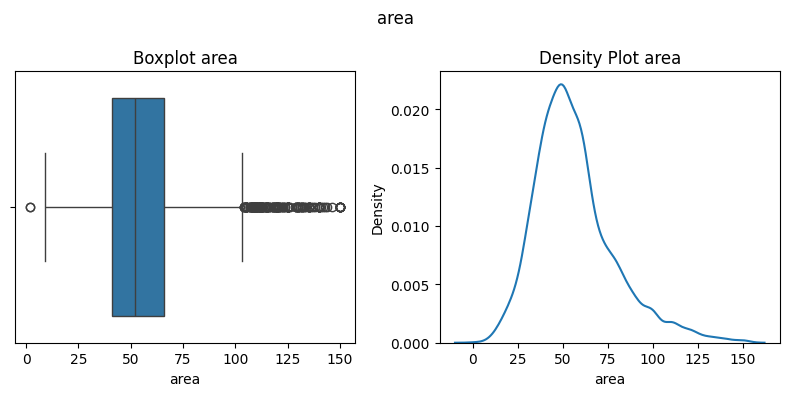

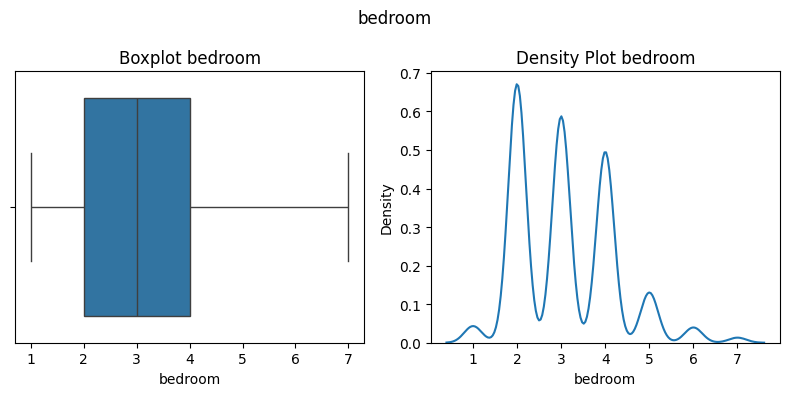

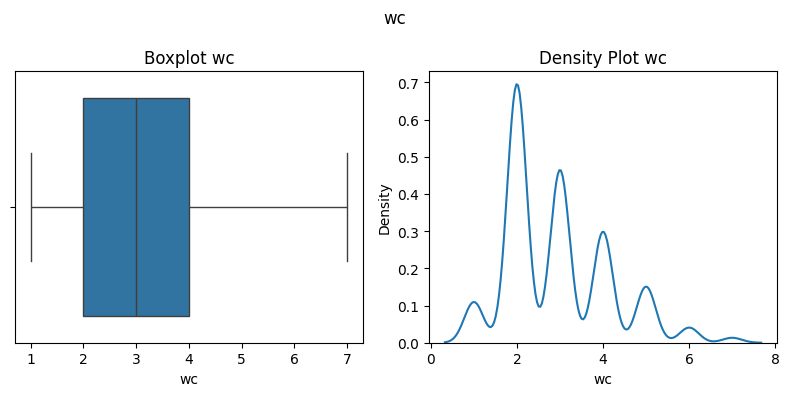

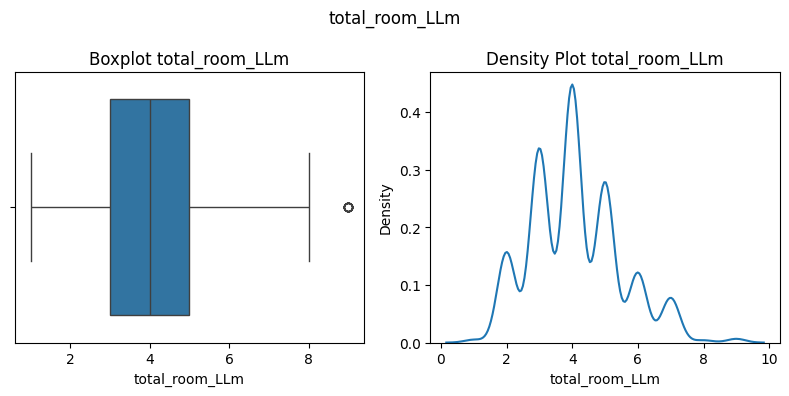

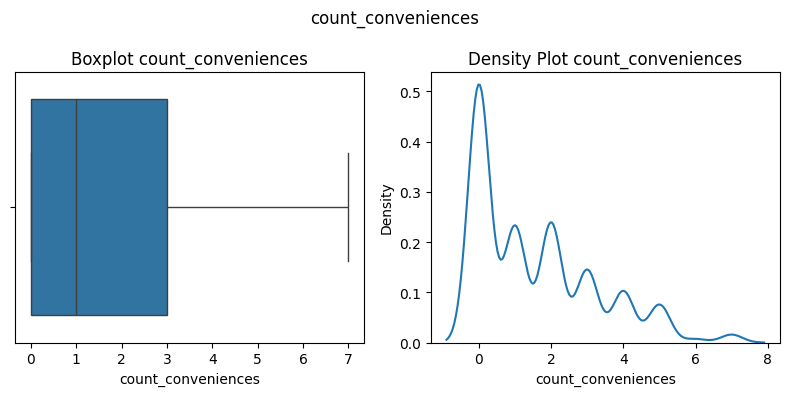

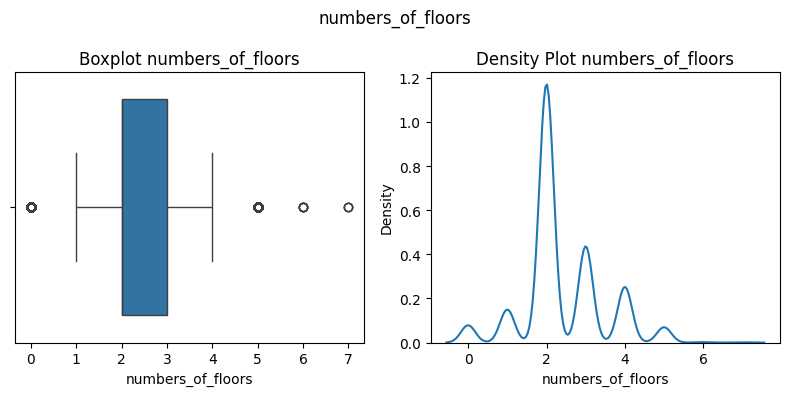

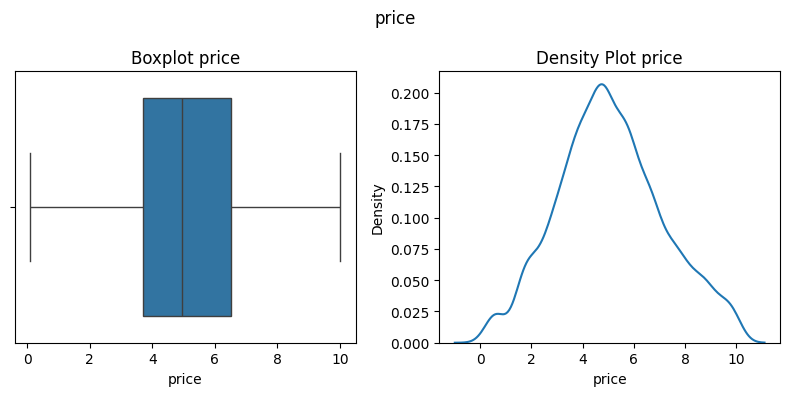

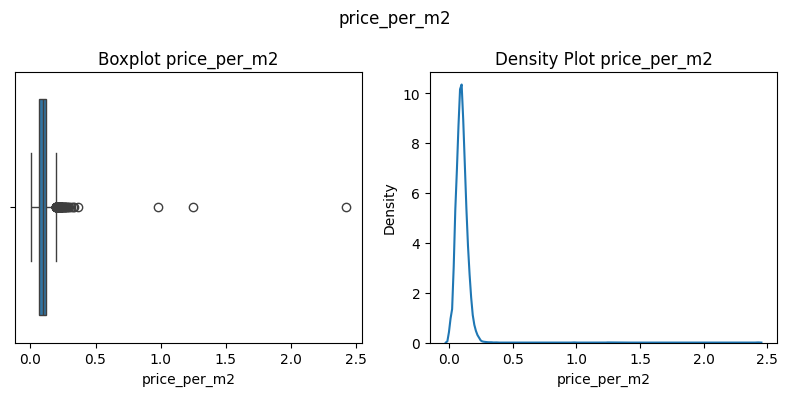

In [ ]:
for column in quantitative_columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Boxplot
    sns.boxplot(x=merged_data[column], ax=axes[0])
    axes[0].set_title(f'Boxplot {column}')
    # Density plot
    sns.kdeplot(merged_data[column], ax=axes[1]) # Changed index to 1
    axes[1].set_title(f'Density Plot {column}') # Changed index to 1

    fig.suptitle(column)
    plt.tight_layout()
    plt.show()


## **Xử lý các cột định tính**

### **Tổng quan về các cột định tính**

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   page_link            5595 non-null   object 
 1   title                5595 non-null   object 
 2   article_id           5595 non-null   float64
 3   category             5595 non-null   object 
 4   phone                5594 non-null   float64
 5   district             5595 non-null   object 
 6   date_posted          5595 non-null   object 
 7   area                 5580 non-null   float64
 8   bedroom              4954 non-null   float64
 9   wc                   4537 non-null   float64
 10  direction            566 non-null    object 
 11  balcony_direction    234 non-null    object 
 12  description          5595 non-null   object 
 13  total_room_LLm       2863 non-null   float64
 14  count_conveniences   5595 non-null   int64  
 15  alleyway_property    4866 non-null   f

In [ ]:
qualitative_columns = ['category', 'district', 'direction', 'balcony_direction', 'alleyway_property', 'under_mortgage', 'residential_purpose', 'furnished', 'has_lowerlevel', 'has_rooftop']

for column in qualitative_columns:
    print(f"**{column}**")
    print(f"Số giá trị bị thiếu: {merged_data[column].isna().sum()} (={merged_data[column].isna().sum()/merged_data.shape[0] * 100:.2f}%)")
    print(f"Số giá trị khác nhau: {merged_data[column].nunique()}")
    print(f"Giá trị phổ biến nhất: {merged_data[column].value_counts().index[0]}")
    print(f"Tỉ lệ giá trị phổ biến nhất: {merged_data[column].value_counts().values[0] / merged_data.shape[0] * 100:.2f}%")


**category**
Số giá trị bị thiếu: 0 (=0.00%)
Số giá trị khác nhau: 4
Giá trị phổ biến nhất: Nhà riêng
Tỉ lệ giá trị phổ biến nhất: 96.30%
**district**
Số giá trị bị thiếu: 0 (=0.00%)
Số giá trị khác nhau: 23
Giá trị phổ biến nhất: Gò Vấp
Tỉ lệ giá trị phổ biến nhất: 16.03%
**direction**
Số giá trị bị thiếu: 5029 (=89.88%)
Số giá trị khác nhau: 8
Giá trị phổ biến nhất: Đông-Nam
Tỉ lệ giá trị phổ biến nhất: 1.72%
**balcony_direction**
Số giá trị bị thiếu: 5361 (=95.82%)
Số giá trị khác nhau: 8
Giá trị phổ biến nhất: Nam
Tỉ lệ giá trị phổ biến nhất: 0.71%
**alleyway_property**
Số giá trị bị thiếu: 729 (=13.03%)
Số giá trị khác nhau: 2
Giá trị phổ biến nhất: 1.0
Tỉ lệ giá trị phổ biến nhất: 86.74%
**under_mortgage**
Số giá trị bị thiếu: 4616 (=82.50%)
Số giá trị khác nhau: 2
Giá trị phổ biến nhất: 0.0
Tỉ lệ giá trị phổ biến nhất: 11.37%
**residential_purpose**
Số giá trị bị thiếu: 3193 (=57.07%)
Số giá trị khác nhau: 1
Giá trị phổ biến nhất: 1.0
Tỉ lệ giá trị phổ biến nhất: 42.93%
**furnis

**Tần suất xuất hiện của các giá trị**

In [ ]:
for column in qualitative_columns:
    print(f"**{column}**")
    print(merged_data[column].value_counts(dropna = False))
    print()

**category**
category
Nhà riêng      5388
Nhà             196
Luxury home       9
Nhà cổ            2
Name: count, dtype: int64

**district**
district
Gò Vấp        897
Bình Tân      788
Tân Bình      678
Bình Thạnh    600
Tân Phú       511
Thủ Đức       309
Phú Nhuận     308
Quận 9        243
Quận 12       207
Quận 7        203
Quận 8        175
Quận 10       143
Hóc Môn       107
Quận 11        85
Quận 3         73
Quận 5         54
Quận 6         52
Quận 2         41
Bình Chánh     35
Quận 4         32
Quận 1         29
Nhà Bè         17
Củ Chi          8
Name: count, dtype: int64

**direction**
direction
NaN         5029
Đông-Nam      96
Đông          73
Nam           71
Bắc           70
Đông-Bắc      69
Tây-Nam       64
Tây-Bắc       62
Tây           61
Name: count, dtype: int64

**balcony_direction**
balcony_direction
NaN         5361
Nam           40
Đông-Nam      36
Tây           33
Đông          32
Tây-Nam       27
Tây-Bắc       25
Bắc           23
Đông-Bắc      18
Name: count

### **Xử lý cột residential_purpose**

Cột residential_purpose nhằm xác định các ngôi nhà được xây dựng trên đất hợp pháp cho nhu cầu ở (còn gọi là đất thổ cư), có 2 giá trị là: 1 -> xác định là hợp pháp, 0 -> xác định là không hợp pháp. Trong cột đó, có tổng cộng 2445 giá trị 1, 3267 giá trị bị thiếu, không tồn tại giá trị 0. Như vậy, trong trường hợp này cột residential_purpose không có ý nghĩa.

In [ ]:
merged_data.drop(columns=['residential_purpose'], inplace=True)

## **Các cột còn lại**

In [ ]:
useless_columns = ['page_link', 'title', 'description']
merged_data.drop(columns=useless_columns, inplace=True)

**Thay đổi kiểu của cột article_id**

In [ ]:
import numpy as np
# sử dụng format_float_positional
for i in range(len(merged_data['article_id'])):
    merged_data.loc[i, 'article_id'] = np.format_float_positional(merged_data.loc[i, 'article_id'], trim='-')
merged_data['article_id'] = merged_data['article_id'].astype(str)

**Thay đổi kiểu cột date_posted**

Thuật toán chuyển đổi kiểu dữ liệu sang date-time nhanh hơn so với cách thông thường: https://stackoverflow.com/questions/29882573/pandas-slow-date-conversion

In [ ]:
def lookup(date_pd_series, format=None):
    dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
    return date_pd_series.map(dates)
merged_data['date_posted'] = lookup(merged_data['date_posted'], format='%Y-%m-%d')

# **Kết quả**

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   article_id          5595 non-null   object        
 1   category            5595 non-null   object        
 2   phone               5594 non-null   float64       
 3   district            5595 non-null   object        
 4   date_posted         5595 non-null   datetime64[ns]
 5   area                5580 non-null   float64       
 6   bedroom             4954 non-null   float64       
 7   wc                  4537 non-null   float64       
 8   direction           566 non-null    object        
 9   balcony_direction   234 non-null    object        
 10  total_room_LLm      2863 non-null   float64       
 11  count_conveniences  5595 non-null   int64         
 12  alleyway_property   4866 non-null   float64       
 13  under_mortgage      979 non-null    float64     

In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

### **Lưu ý khi sử dụng dữ liệu đã xử lý ở giai đoạn sau của đồ án**
Như đề cập ở đầu bài viết, giai đoạn sau của đồ án xử dụng nhiều loại mô hình khác nhau. Có một số mô hình có thể xử lý dữ liệu phân loại, dữ liệu bị thiếu nên các bước xử lý 2 trường hợp đó không được trình bày trong bài viết này. \
 Ví dụ, cột direction và cột balcony_direction là cột có chứa rất nhiều dữ liệu bị thiếu. Chúng có thể không phù hợp với mô hình hồi quy tuyến tính. Còn đối với các mô hình dựa trên cây, ta có thể xem các dữ liệu bị thiếu thành một nhóm độc lập, có thể vẫn phù hợp với các mô hình đó.

**Một số phương pháp xử lý dữ liệu bị thiếu** \

| Phương pháp | Mô tả | Ưu điểm | Nhược điểm |
| --- | --- | --- | --- |
| **Loại bỏ quan sát có giá trị bị thiếu** | Loại bỏ hoàn toàn các quan sát có một hoặc nhiều giá trị bị thiếu | - Đơn giản và dễ thực hiện <br> - Không ảnh hưởng đến mối quan hệ giữa các biến | - Có thể mất nhiều thông tin quan trọng <br> - Có thể dẫn đến sai lệch kết quả nếu dữ liệu bị thiếu không ngẫu nhiên |
| **Điền giá trị phổ biến nhất** | Thay thế giá trị bị thiếu bằng giá trị phổ biến nhất của biến đó | - Dễ thực hiện <br> - Dữ liệu được giữ nguyên | - Không tính đến sự liên kết giữa các biến <br> - Có thể dẫn đến sai lệch kết quả nếu dữ liệu bị thiếu có cấu trúc |
| **Điền giá trị dựa trên hồi quy** | Sử dụng mô hình hồi quy để dự đoán giá trị bị thiếu dựa trên các biến khác | - Tính đến mối liên hệ giữa các biến <br> - Dự đoán giá trị dựa trên quy luật chung | - Yêu cầu chất lượng dữ liệu tốt <br> - Phức tạp hơn so với các phương pháp khác |
| **Điền giá trị dựa trên khoảng cách** | Tìm quan sát tương tự nhất và sử dụng giá trị của nó để điền vào giá trị bị thiếu | - Đơn giản và dễ hiểu <br> - Có thể áp dụng cho các biến định tính | - Chỉ sử dụng được cho các biến định tính <br> - Không tính đến sự liên kết giữa các biến |
| **Sử dụng mô hình máy học** | Huấn luyện mô hình máy học trên dữ liệu đầy đủ, sau đó sử dụng mô hình này để dự đoán giá trị bị thiếu | - Tính đến mối liên hệ phức tạp giữa các biến <br> - Có thể xử lý nhiều kiểu dữ liệu khác nhau | - Yêu cầu chất lượng và lượng dữ liệu tốt <br> - Phức tạp về mặt tính toán |

# **Phân tích khám phá dữ liệu**

## **Phân tích khám phá dữ liệu chỉ một thuộc tính**

### **Cột diện tích**

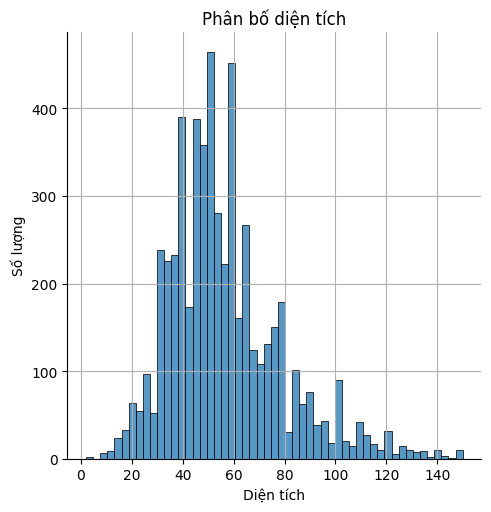

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(merged_data['area'])
plt.title('Phân bố diện tích')
plt.xlabel('Diện tích')
plt.ylabel('Số lượng')
plt.grid()
plt.show()

Diện tích phổ biến của nhà ở TP. HCM là từ 30 -> 80 m2

### **Cột category**

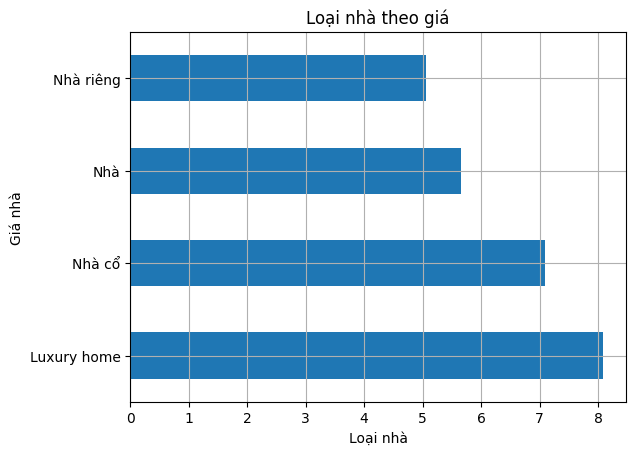

In [ ]:
merged_data.groupby('category')['price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Loại nhà theo giá')
plt.xlabel('Loại nhà')
plt.ylabel('Giá nhà')
plt.grid()
plt.show()

Luxury home có giá nhà cao nhất

### **Cột price_per_m2**

### **Cột district**

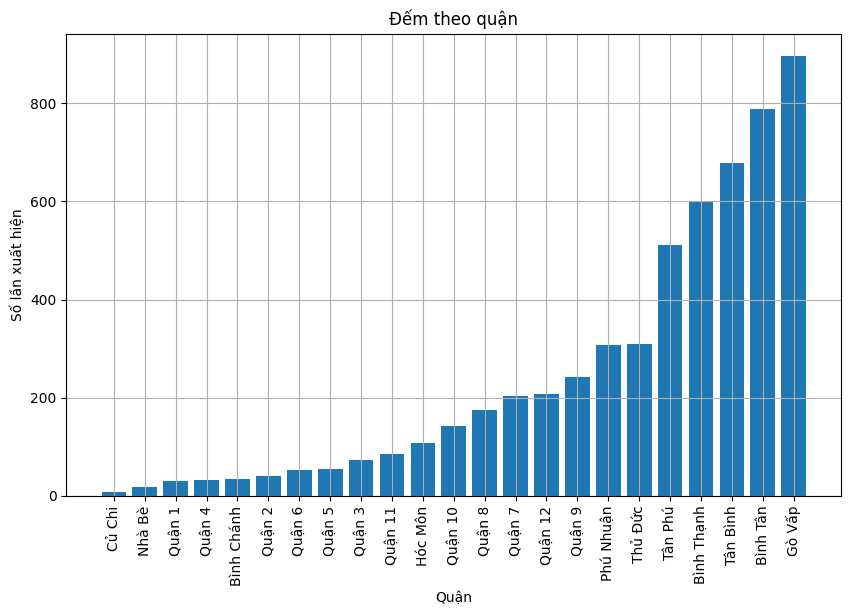

In [ ]:
district_freq = merged_data['district'].value_counts().sort_values(ascending=True)
plt.subplots(figsize=(10,6))
plt.bar(district_freq .index, district_freq.values)
plt.title('Đếm theo quận')
plt.xticks(rotation=90)
plt.xlabel('Quận')
plt.ylabel('Số lần xuất hiện')
plt.grid()
plt.show()

Quận Gò Vấp có số lượng đăng bài nhiều nhất

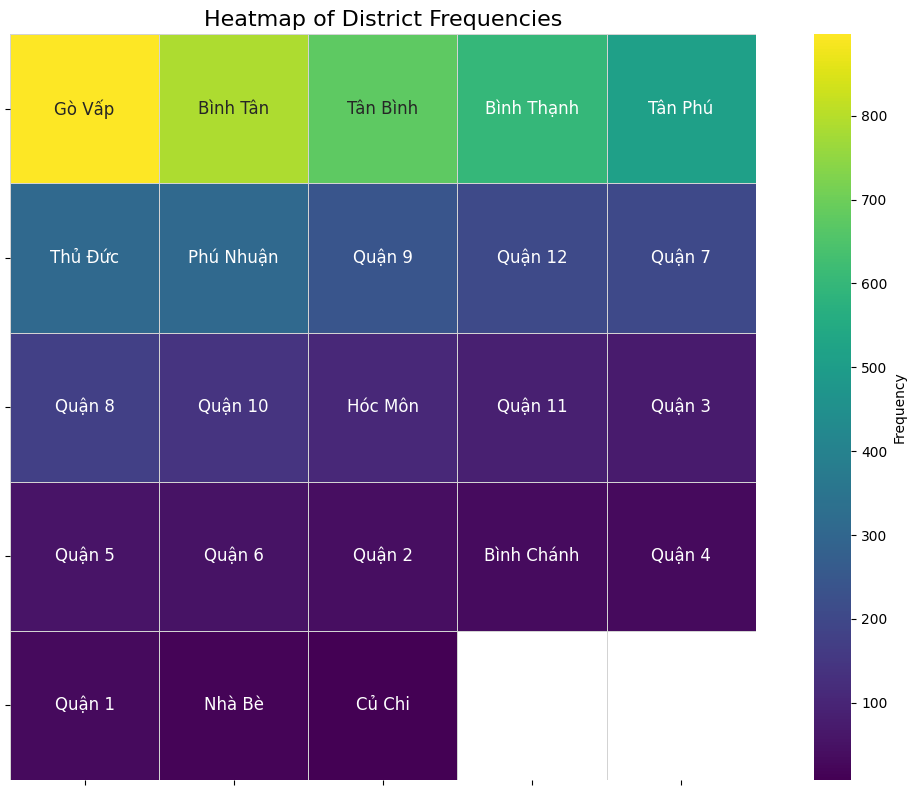

In [ ]:


# Tạo pivot table để tính tầng suất (số nhà xuất hiện trong mỗi quận)
pivot_table = df_location['district'].value_counts().reset_index()
pivot_table.columns = ['district', 'tần suất']

# Sắp xếp các giá trị để chúng tôi có thể thêm các giá trị NaN
districts = pivot_table['district'].values
frequencies = pivot_table['tần suất'].values

# Xác định kích thước của lưới
num_districts = len(districts)
square_size = int(np.ceil(np.sqrt(num_districts)))

# Thêm các giá trị NaN để lấp đầy lưới
nan_fillers = square_size ** 2 - num_districts
districts = np.append(districts, [''] * nan_fillers)
frequencies = np.append(frequencies, [np.nan] * nan_fillers)

# Tạo DataFrame để làm heatmap
heatmap_data = pd.DataFrame(frequencies.reshape(square_size, square_size),
                            index=districts[:square_size * square_size:square_size],
                            columns=districts[:square_size])

# Tạo heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data=heatmap_data, annot=districts.reshape(square_size, square_size), fmt='', cmap='viridis',
                 linewidths=0.5, linecolor='lightgray', annot_kws={'fontsize': 12}, square=True, cbar_kws={'label': 'Frequency'})

# Đặt tiêu đề và thiết lập nhãn trục
plt.title('Heatmap of District Frequencies', fontsize=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()


### **Cột numbers_of_floors**

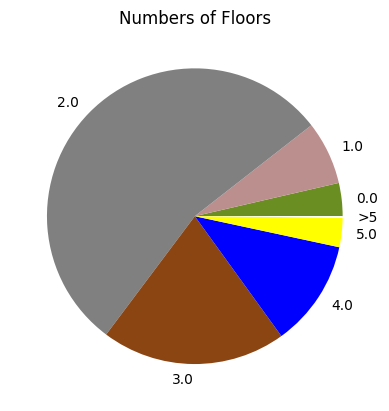

In [ ]:
numbers_of_floors = merged_data['numbers_of_floors'].value_counts()
numbers_of_floors_less_5 = numbers_of_floors[numbers_of_floors.index <=5].sort_index()
numbers_of_floors_more_5 = numbers_of_floors[numbers_of_floors.index >5].sum()
numbers_of_floors_less_5['>5'] = numbers_of_floors_more_5
fig, ax = plt.subplots()
ax.pie(numbers_of_floors_less_5, labels=numbers_of_floors_less_5.index,
       colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown','blue','yellow','white'])
ax.set_title('Numbers of Floors')

plt.show()

Đa số các nhà được đăng bán có số tầng là hai, ta thấy điều này hợp lí, vì ta thấy ở thành phố đa số các nhà đều có tầng, do có không gian xây dựng nhỏ, nên phải tối ưu chỗ ở bằng cách xây thêm tầng.

### **Cột date-posted**

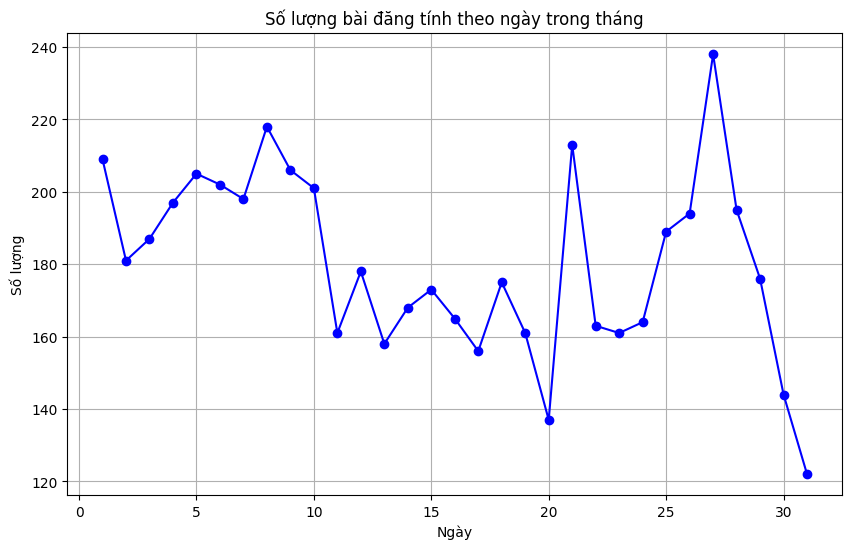

In [ ]:
day_counts =  merged_data['date_posted'].dt.day.value_counts()
index = [i for i in range(1,32)]
day_counts =  merged_data['date_posted'].dt.day.value_counts()
plt.figure(figsize=(10, 6))
plt.plot(index,day_counts.sort_index(), marker='o', linestyle='-', color='b')
plt.title('Số lượng bài đăng tính theo ngày trong tháng')
plt.xlabel('Ngày')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

Số lượng bài đăng biến động lên xuống trong các ngày của tháng.

### **Cột phone**

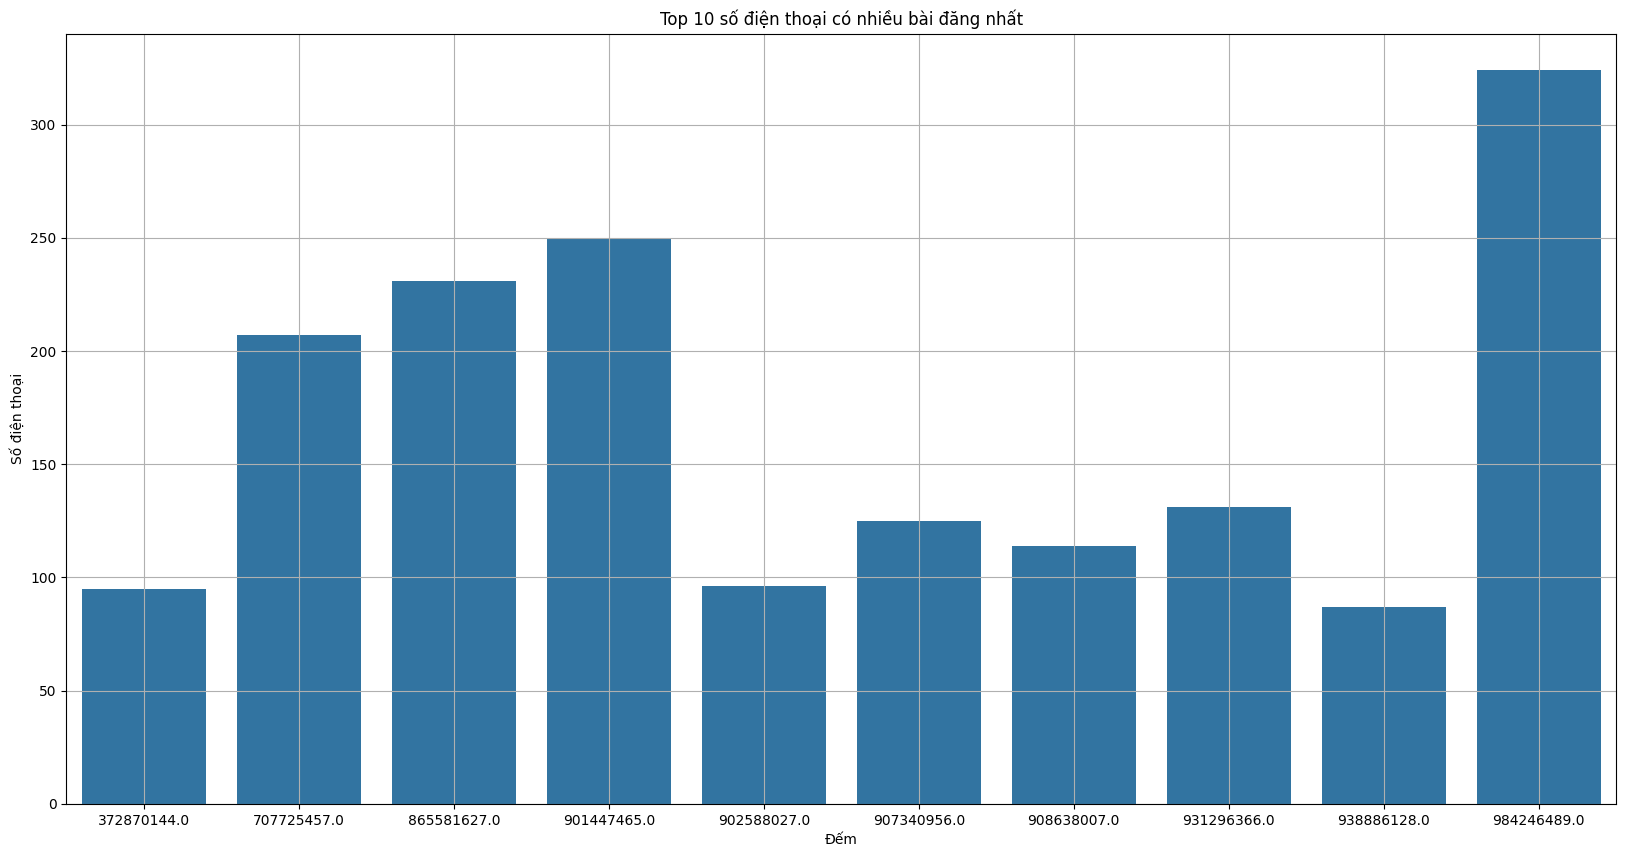

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(merged_data['phone'].value_counts().head(10))
plt.title('Top 10 số điện thoại có nhiều bài đăng nhất')
plt.xlabel('Đếm')
plt.ylabel('Số điện thoại')
plt.grid()
plt.show()

Số điện thoại 984246489 có số bài đăng tin lớn nhất.

## **Phân tích khám phá dữ liệu của mối quan hệ giữa 2 thuộc tính**

### **Trung bình giá nhà theo các đặc điểm nội thất, tầng hầm, sân thượng**

<ipython-input-204-372db567e1d8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(["False", "True"], fontfamily='serif')
<ipython-input-204-372db567e1d8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(["False", "True"], fontfamily='serif')
<ipython-input-204-372db567e1d8>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(["False", "True"], fontfamily='serif')


<BarContainer object of 2 artists>

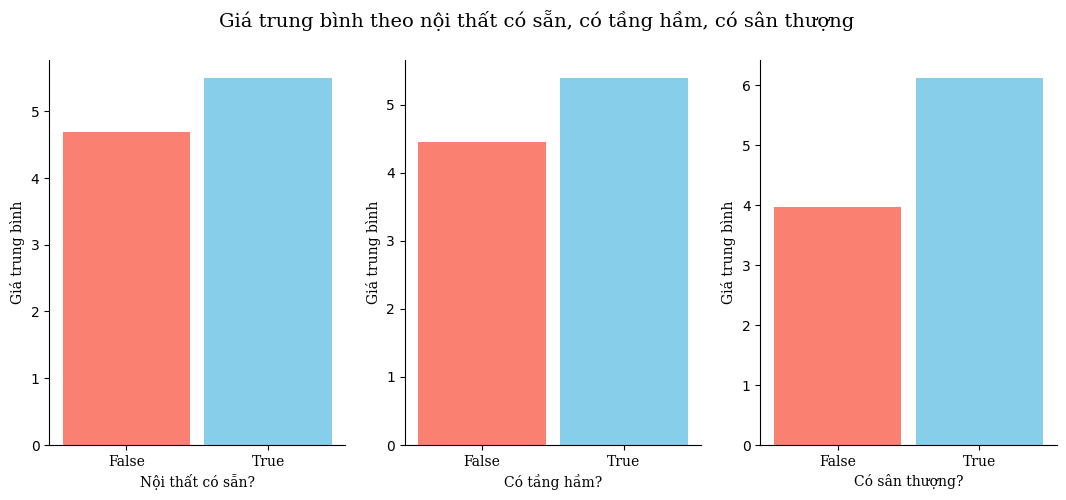

In [ ]:
mean_price_by_furnished = merged_data.groupby('furnished')['price'].mean()
mean_price_by_has_lowerlevel = merged_data.groupby('has_lowerlevel')['price'].mean()
mean_price_by_has_rooftop = merged_data.groupby('has_rooftop')['price'].mean()

fig, ax = plt.subplots(figsize=(13, 5), ncols = 3, nrows = 1)
fig.suptitle("Giá trung bình theo nội thất có sẵn, có tầng hầm, có sân thượng", family = 'serif', fontsize = 14)

ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set_xlabel("Nội thất có sẵn?", family = 'serif')
ax[0].set_ylabel("Giá trung bình", family = 'serif')
ax[0].set_xticklabels(["False", "True"], fontfamily='serif')
ax[0].bar(["False", "True"], mean_price_by_furnished.values, width=0.9, color = ['salmon', 'skyblue'])

ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set_xlabel("Có tầng hầm?", family = 'serif')
ax[1].set_ylabel("Giá trung bình", family = 'serif')
ax[1].set_xticklabels(["False", "True"], fontfamily='serif')
ax[1].bar(["False", "True"], mean_price_by_has_lowerlevel, width=0.9, color = ['salmon', 'skyblue'])

ax[2].spines[['right', 'top']].set_visible(False)
ax[2].set_xlabel("Có sân thượng?", family = 'serif')
ax[2].set_ylabel("Giá trung bình", family = 'serif')
ax[2].set_xticklabels(["False", "True"], fontfamily='serif')
ax[2].bar(["False", "True"], mean_price_by_has_rooftop, width=0.9, color = ['salmon', 'skyblue'])


Khi tính theo 3 đặc điểm là: Nội thất, tầng hầm, sân thượng; giá nhà trung bình của nhóm có đặc điểm ấy cao hơn so với giá trung bình không có đặc điểm ấy

### **Diện tích trung bình theo quận**

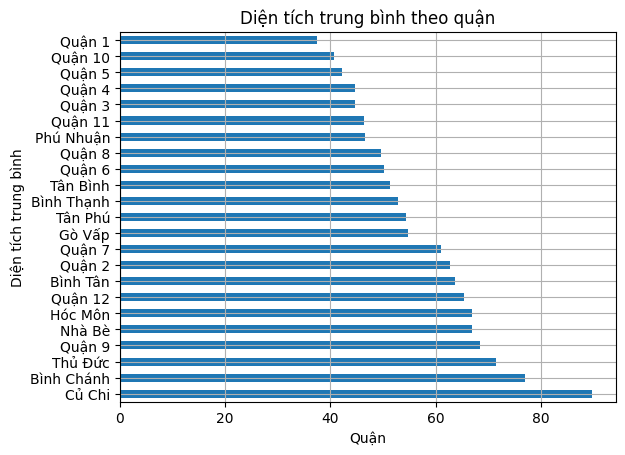

In [ ]:
merged_data.groupby('district')['area'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Diện tích trung bình theo quận')
plt.xlabel('Quận')
plt.ylabel('Diện tích trung bình')
plt.grid()
plt.show()

### **Giá trung bình theo quận**

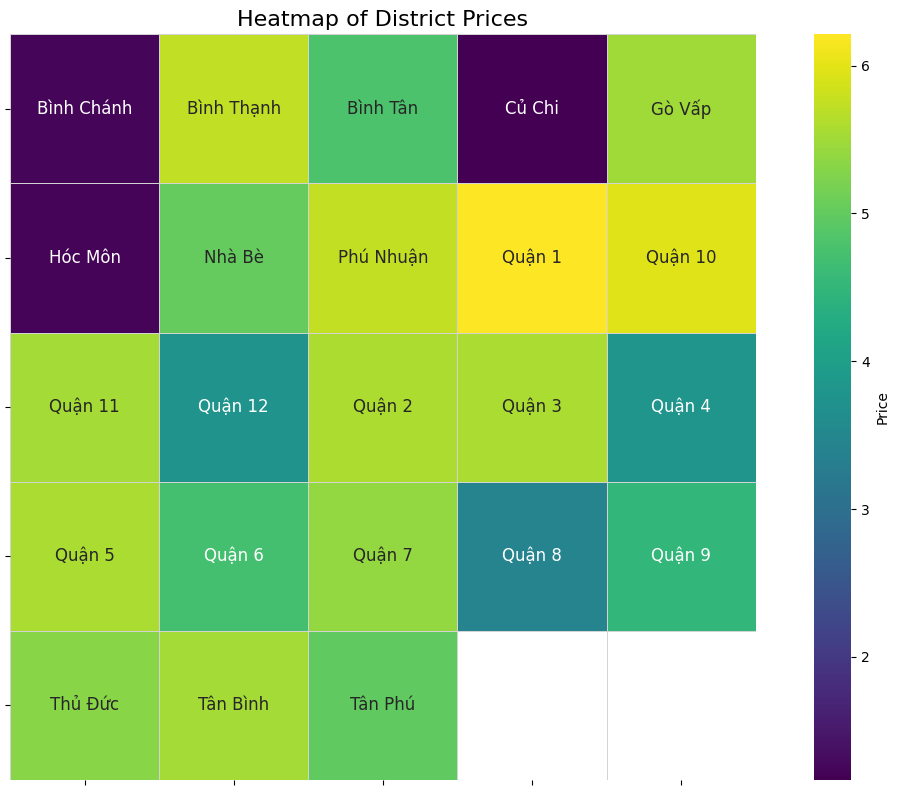

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Tạo pivot table để dùng cho heatmap
pivot_table = merged_data.pivot_table(values='price', index='district', aggfunc='mean').reset_index()

# Sắp xếp các giá trị để chúng tôi có thể thêm các giá trị NaN
districts = pivot_table['district'].values
prices = pivot_table['price'].values

# Xác định kích thước của lưới
num_districts = len(districts)
square_size = int(np.ceil(np.sqrt(num_districts)))

# Thêm các giá trị NaN để lấp đầy lưới
nan_fillers = square_size ** 2 - num_districts
districts = np.append(districts, [''] * nan_fillers)
prices = np.append(prices, [np.nan] * nan_fillers)

# Tạo DataFrame để làm heatmap
heatmap_data = pd.DataFrame(prices.reshape(square_size, square_size),
                            index=districts[:square_size * square_size:square_size],
                            columns=districts[:square_size])

# Tạo heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data=heatmap_data, annot=districts.reshape(square_size, square_size), fmt='', cmap='viridis',
                 linewidths=0.5, linecolor='lightgray', annot_kws={'fontsize': 12}, square=True, cbar_kws={'label': 'Price'})

# Đặt tiêu đề và thiết lập nhãn trục
plt.title('Heatmap of District Prices', fontsize=16)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()


### **Biểu đồ giá trên M2 theo quận.**

In [ ]:
# cài đặt thưu viện để vẽ hình
from IPython.display import clear_output
clear_output()
!pip install geopandas matplotlib mplcursors -q

<ipython-input-208-41b4dc73ee8a>:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_data.geometry.centroid.x, geo_data.geometry.centroid.y, geo_data['Ten_Huyen']):


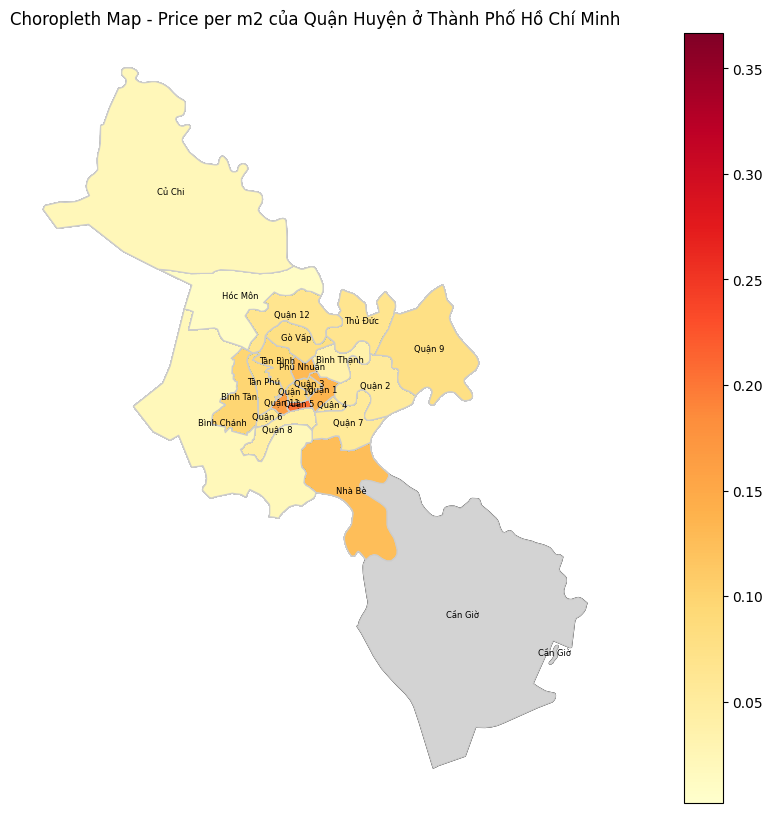

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
df_location = pd.read_csv('https://raw.githubusercontent.com/KhiemDangLe/Final-Project/main/2-PreprocessingAndEDA/preprocessed_data.csv')

# Giả sử bạn đã tải các file CSV từ URL và lưu chúng vào file cục bộ
df_location1 = pd.read_csv('https://github.com/user-attachments/files/15845426/merged_data_with_long_lat_0_5000.csv')
df_location2 = pd.read_csv('https://github.com/user-attachments/files/15845227/merged_data_with_long_lat_5000_10000.csv')

# Gộp dữ liệu lại với nhau
merged_df1 = pd.merge(df_location[['article_id', 'price','district','street_name','price_per_m2']], df_location1[['article_id', 'longitude', 'latitude']], on='article_id', how='inner')
merged_df2 = pd.merge(df_location[['article_id', 'price','district','street_name','price_per_m2']], df_location2[['article_id', 'longitude', 'latitude']], on='article_id', how='inner')
merged_df = pd.concat([merged_df1, merged_df2], ignore_index=True)

# Đọc dữ liệu từ tệp geo.json
geo_data = gpd.read_file('https://raw.githubusercontent.com/huytrao/VietNam-Intern-Map/main/hochiminh.geojson')

# Merge dữ liệu địa lý với dữ liệu giá
merged_data_temp = geo_data.merge(merged_df, how='left', left_on='Ten_Huyen', right_on='district')

# Vẽ biểu đồ Choropleth map
fig, ax = plt.subplots(figsize=(18, 10))
geo_data.plot(ax=ax, color='white', edgecolor='black')
merged_data_temp.plot(column='price_per_m2', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                 missing_kwds={"color": "lightgrey", "label": "No data"})

# Hiển thị tên huyện
for x, y, label in zip(geo_data.geometry.centroid.x, geo_data.geometry.centroid.y, geo_data['Ten_Huyen']):
    ax.text(x, y, label, fontsize=6, ha='center')

# Tùy chỉnh biểu đồ
ax.set_title('Choropleth Map - Price per m2 của Quận Huyện ở Thành Phố Hồ Chí Minh')
ax.set_axis_off()

# Tạo tooltip hiển thị thông tin giá khi nhấp vào
def tooltip_text(sel):
    idx = sel.target.index
    price = merged_data_temp.iloc[idx]['price_per_m2']
    if price == -1:
        sel.annotation.set_text(f"{merged_data_temp.iloc[idx]['Ten_Huyen']}\nNo data")
    else:
        sel.annotation.set_text(f"{merged_data_temp.iloc[idx]['Ten_Huyen']}\nGiá: {price:.2f}")

cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", tooltip_text)

# Hiển thị biểu đồ
plt.show()

Các quận nội thành  ở trung tâm có màu đậm hơn, cho thấy giá đất ở những khu vực này cao hơn.
Các khu vực ngoại thành như Củ Chi, Hóc Môn, và Bình Chánh có màu vàng nhạt, cho thấy giá đất thấp hơn.
Huyện Cần Giờ được hiển thị màu xám, có thể do thiếu dữ liệu hoặc giá đất ở đây rất thấp so với các khu vực khác.


### **Biểu đồ đường biểu thị giá theo thời gian**

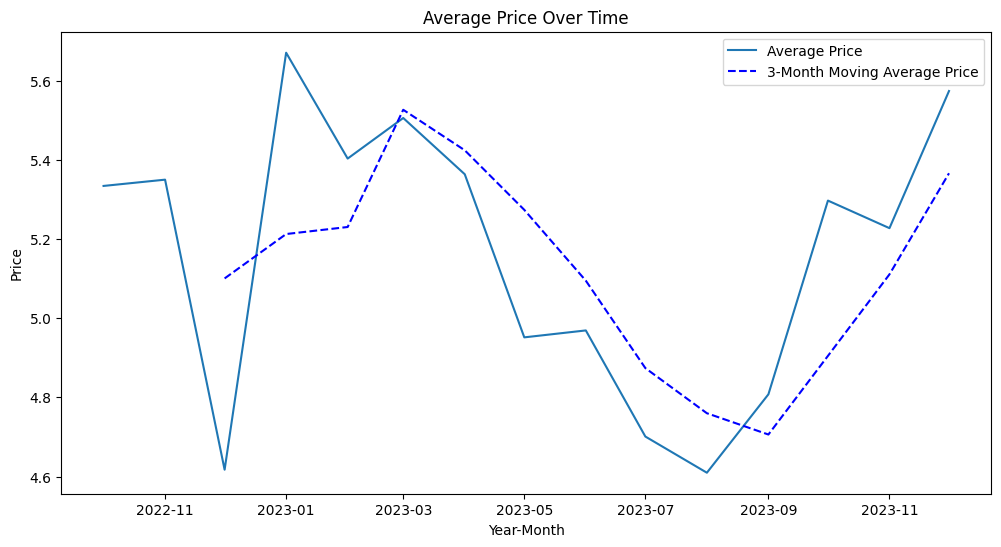

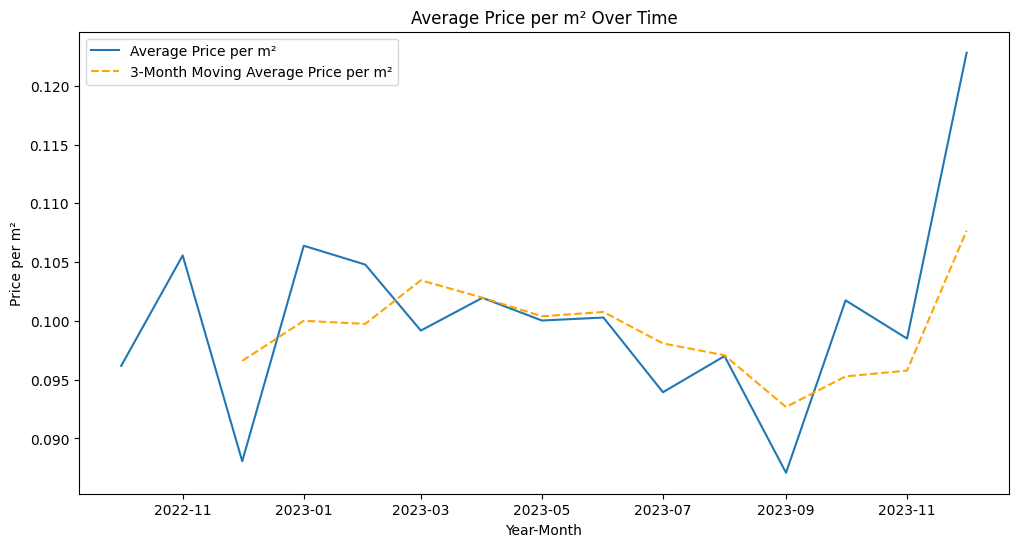

In [ ]:


# Đảm bảo cột 'date_posted' có dạng datetime64
merged_data['date_posted'] = pd.to_datetime(merged_data['date_posted'])

# Tạo cột tháng-năm từ cột 'date_posted'
merged_data['year_month'] = merged_data['date_posted'].dt.to_period('M')

# Tính giá trị trung bình cho mỗi tháng
monthly_avg = merged_data.groupby('year_month').agg({
    'price': 'mean',
    'price_per_m2': 'mean'
}).reset_index()

# Chuyển đổi cột 'year_month' trở lại dạng datetime để vẽ biểu đồ
monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp()

# Tính và thêm đường trung bình động (moving average) cho price và price_per_m2
monthly_avg['price_ma'] = monthly_avg['price'].rolling(window=3).mean()
monthly_avg['price_per_m2_ma'] = monthly_avg['price_per_m2'].rolling(window=3).mean()

# Vẽ biểu đồ line cho price
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['year_month'], monthly_avg['price'], label='Average Price')
plt.plot(monthly_avg['year_month'], monthly_avg['price_ma'], linestyle='--', color='blue', label='3-Month Moving Average Price')

# Thêm tiêu đề và nhãn cho biểu đồ price
plt.title('Average Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.legend()

# Hiển thị biểu đồ price
plt.show()

# Vẽ biểu đồ line cho price per m²
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['year_month'], monthly_avg['price_per_m2'], label='Average Price per m²')
plt.plot(monthly_avg['year_month'], monthly_avg['price_per_m2_ma'], linestyle='--', color='orange', label='3-Month Moving Average Price per m²')

# Thêm tiêu đề và nhãn cho biểu đồ price per m²
plt.title('Average Price per m² Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Price per m²')
plt.legend()

# Hiển thị biểu đồ price per m²
plt.show()

biểu đồ cho thấy giá trung bình mỗi m² có nhiều biến động trong thời gian qua, với một xu hướng tăng mạnh vào cuối năm 2023. Đường trung bình động giúp làm mượt các biến động ngắn hạn và cung cấp cái nhìn tổng quan hơn về xu hướng giá.

### **Mối quan hệ giữa các biến định lượng**

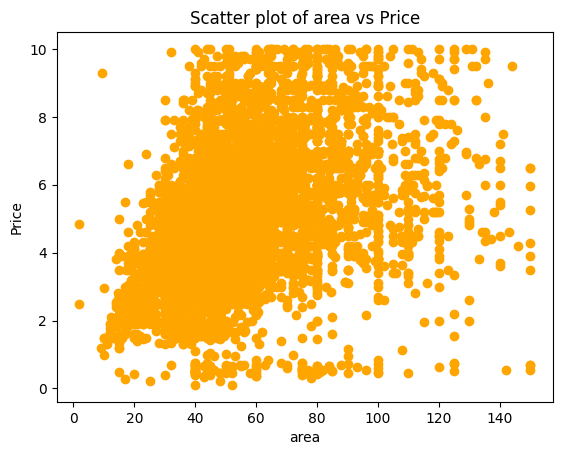

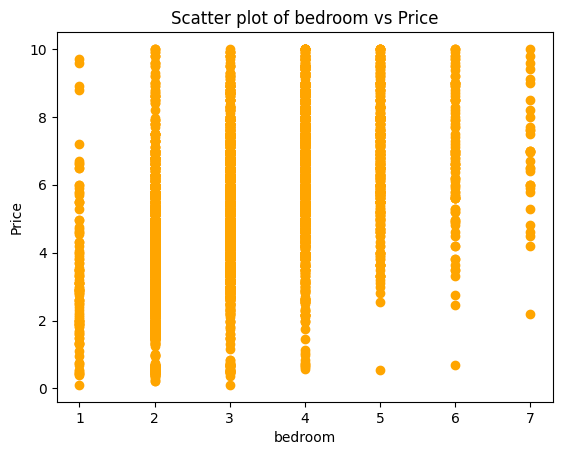

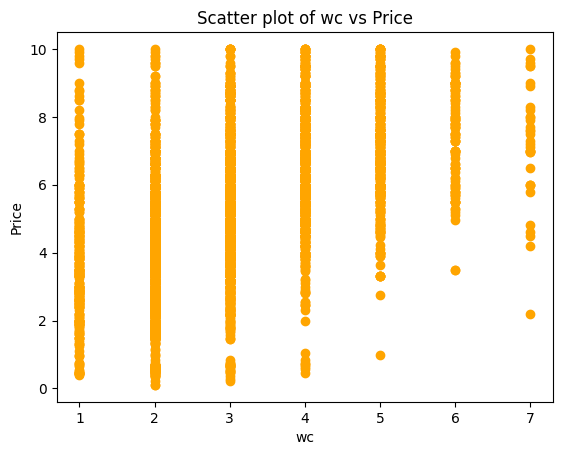

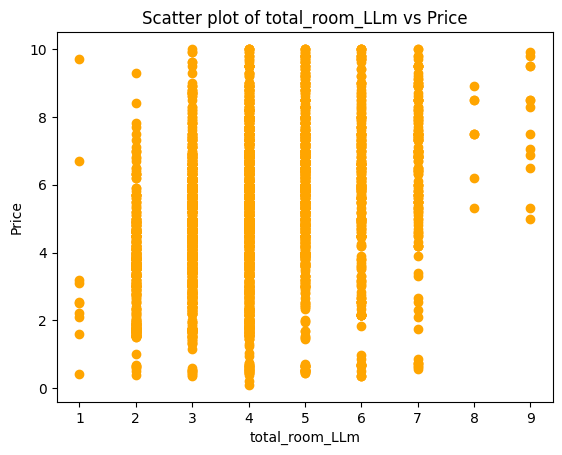

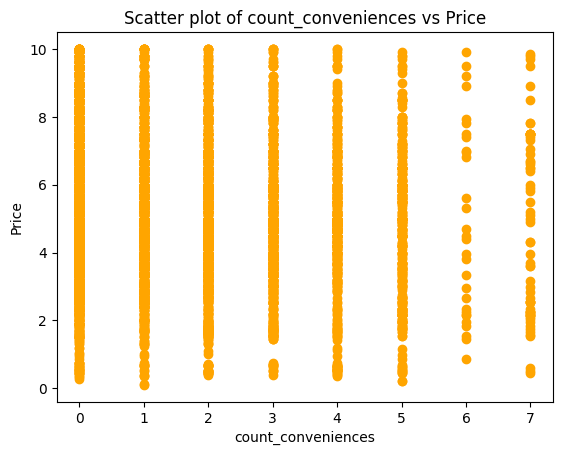

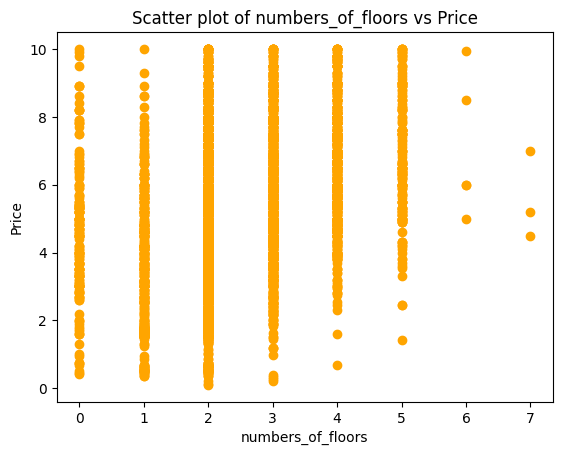

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu

# Check if the 'area' column exists in merged_data
if 'area' in merged_data.columns:
    # Vẽ đồ thị scatter cho từng biến định lượng với price
    quantitative_columns = ['area', 'bedroom', 'wc', 'total_room_LLm', 'count_conveniences', 'numbers_of_floors']
    for col in quantitative_columns:
        if col in merged_data.columns:
            plt.scatter(merged_data[col], merged_data['price'], color='orange')
            plt.title(f'Scatter plot of {col} vs Price')
            plt.xlabel(col)
            plt.ylabel('Price')
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame.")
else:
    print("Column 'area' not found in DataFrame.")

## **Phân tích khám phá dữ liệu của mối liên hệ giữa 3 thuộc tính**

### **Mối quan hệ giữa số tầng, giá trung bình, diện tích trung bình**

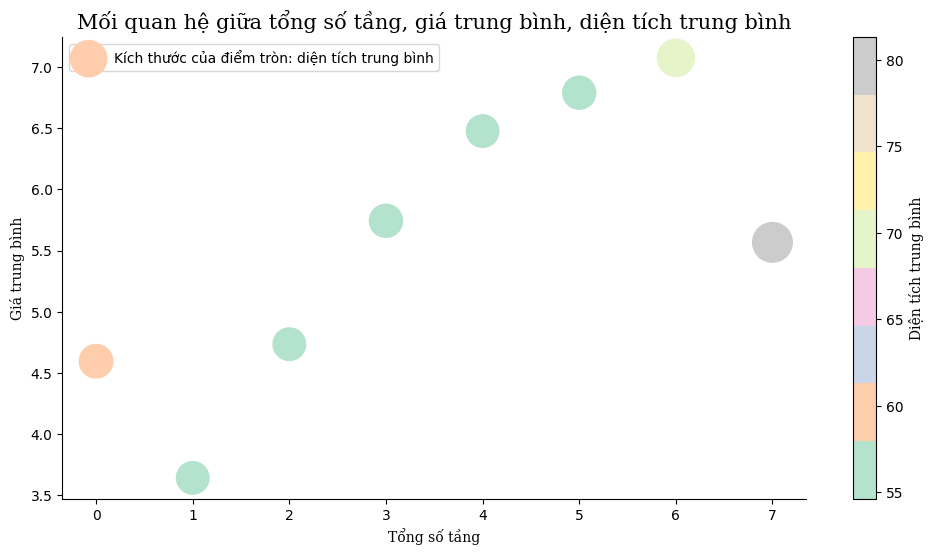

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mean_price_by_nof = merged_data.groupby("numbers_of_floors")["price"].mean()
mean_area_by_nof = merged_data.groupby("numbers_of_floors")["area"].mean()

fig, ax = plt.subplots(figsize=(12, 6))

ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Mối quan hệ giữa tổng số tầng, giá trung bình, diện tích trung bình", family='serif', fontsize=15)
ax.set_xlabel("Tổng số tầng", family='serif')
ax.set_ylabel("Giá trung bình", family='serif')


norm = plt.Normalize(mean_area_by_nof.min(), mean_area_by_nof.max())
colors = plt.cm.Pastel2(norm(mean_area_by_nof))


sc = ax.scatter(mean_price_by_nof.index, mean_price_by_nof, alpha=1, s=mean_area_by_nof * 10, c=colors, label="Kích thước của điểm tròn: diện tích trung bình")


cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Pastel2), ax=ax)
cbar.set_label('Diện tích trung bình', family='serif')


ax.legend()
plt.show()


Khi chia nhà thành các nhóm theo tổng số tầng, diện tích trung bình giữa các nhóm có chênh lệch. Nhóm có tổng số tầng là từ 1 -> 5 có diện tích tương tự nhau. Nhóm có nhiều tầng hơn (6, 7 tầng) có diện tích trung bình cao hơn rất nhiều so với các nhóm còn lại. \
Giá nhà trung bình theo tổng số tầng không có mối quan hệ tuyến tính

## **Tạo thang điểm đánh giá nhà**

Tạo ra thang điểm đánh giá dựa vào các thuộc tính 'area', 'bedroom', 'bathroom', 'numbers_of_floors', 'has_rooftop'

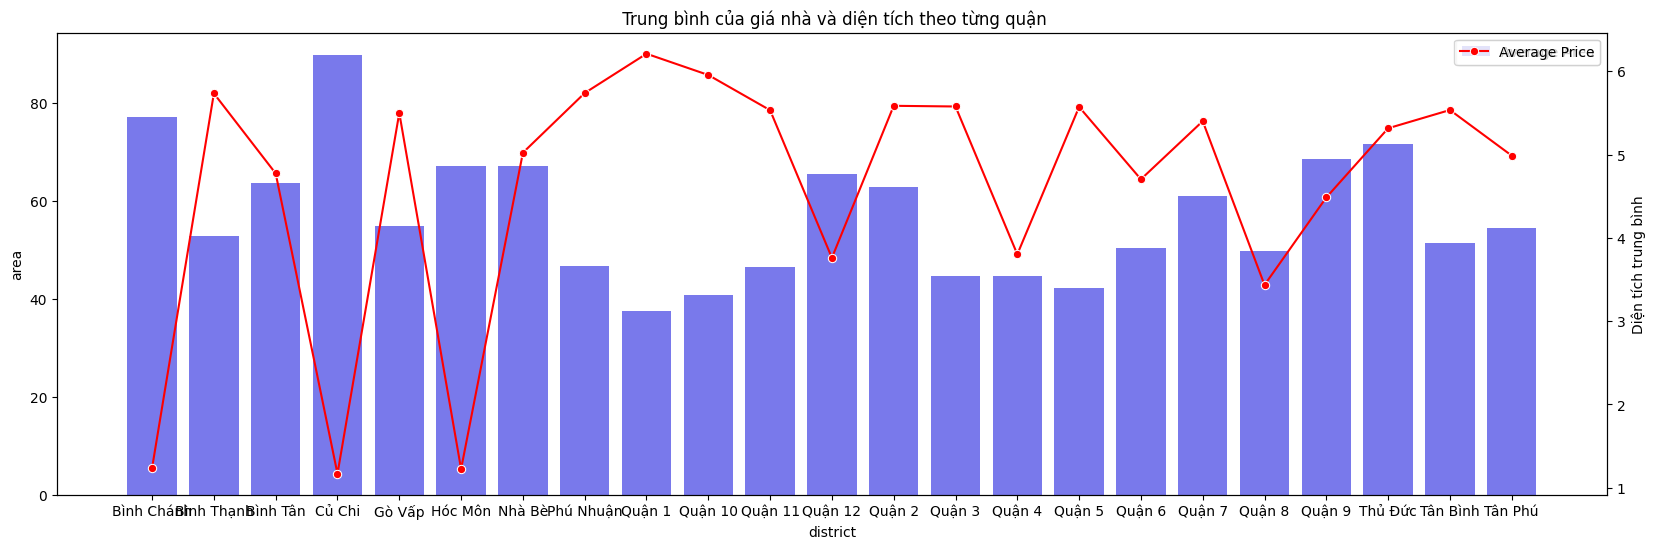

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = merged_data.copy()
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['area', 'bedroom', 'wc', 'numbers_of_floors', 'has_rooftop']])
scaled_df = pd.DataFrame(scaled_features, columns=['area', 'bedroom', 'wc', 'numbers_of_floors', 'has_rooftop'])

data['quality_of_house'] = scaled_df.mean(axis=1)
data['quality_of_house']=data['quality_of_house'] *10

avg_area = data.groupby('district')['area'].mean().reset_index()
avg_price = data.groupby('district')['price'].mean().reset_index()


plt.figure(figsize=(20, 6))
sns.barplot(x='district', y='area', data=avg_area, color='b', alpha=0.6, label='Average Area')
ax2 = plt.twinx()
sns.lineplot(x='district', y='price', data=avg_price, marker='o', color='r', label='Average Price', ax=ax2)
plt.title(' Trung bình của giá nhà và diện tích theo từng quận')
plt.xlabel('Quận')
ax2.set_ylabel('Giá nhà trung bình ' )
plt.ylabel('Diện tích trung bình')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()

Nhà ở quận 1 được bán với giá cao nhất nhưng diện tích thì lại nằm trong nhưng quận có diện tích nhà bán thấp nhất => để sở hữu 1 căn nhà ở quận 1 là điều không dễ

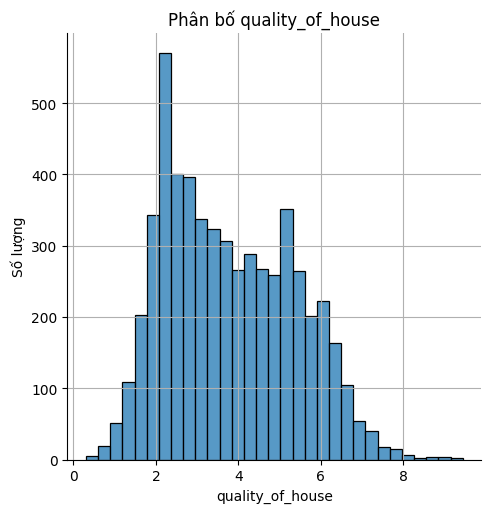

In [ ]:
sns.displot(data['quality_of_house'])
plt.title('Phân bố quality_of_house')
plt.xlabel('quality_of_house')
plt.ylabel('Số lượng')
plt.grid()
plt.show()

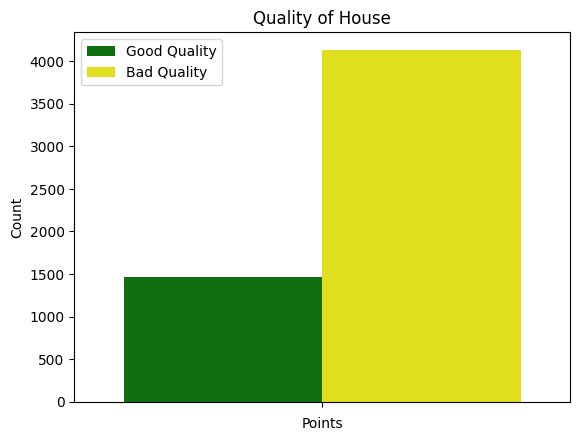

In [ ]:
count=[]
count.append(len(data[data['quality_of_house']>5]))
count.append(len(data[data['quality_of_house']<=5]))
colors = [ '#008000','#FFFF00']
ax = sns.barplot(hue=['Good Quality', 'Bad Quality'], y=count, palette=colors)
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Quality of House')
plt.show()

Trên thang điểm 10 , không có nhiều ngôi nhà đạt chất lượng tốt dựa vào các tiêu chí 'area', 'bedroom', 'wc', 'numbers_of_floors', 'has_rooftop'. Số  lượng nhà chất lượng tốt là ít hơn nhiều so với chất lượng chưa tốt